# Exploratory Data Analysis

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

ROOT_DIR = os.path.join(os.getcwd(), '..')
DATA_DIR = os.path.join(ROOT_DIR, 'data')

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   61756.0  1.112001  0.203803  0.625004  1.525551 -0.411192 -0.487768   
1   14146.0  1.029328  0.342431  1.770207  2.789720 -0.502749  0.889913   
2   86766.0  1.859251 -0.089556 -1.797931  1.263054  0.550073 -0.613878   
3   89554.0  2.007350 -0.201276 -2.975007 -0.564539  2.592582  3.148763   
4  152467.0  1.971963 -0.260036 -0.890866  0.157986 -0.400340 -0.456131   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.097128 -0.058188  0.240017  ... -0.060900  0.046016 -0.004771  0.617385   
1 -0.765758  0.305110  0.984184  ... -0.134066  0.057442  0.088813  0.176178   
2  0.623408 -0.260165 -0.013979  ...  0.124618  0.368915 -0.120664 -0.391513   
3 -0.394311  0.779978  0.357899  ... -0.342027 -1.005914  0.348492  0.605699   
4 -0.637954  0.162661  1.247789  ... -0.244251 -0.621574  0.344276 -0.564486   

        V25       V26       V27       V28  Amount  Class  
0  0.591968 -0.346343  0.039778  0.022870   16.23      0  
1  0.174183 -0.084959  0.035024  0.019577    0.00      0  
2  0.436563 -0.494140 -0.034843 -0.062490   85.98      0  
3 -0.270805  0.217856 -0.042423 -0.039825   18.99      0  
4 -0.546258 -0.272251  0.015402 -0.026908    1.00      0  

[5 rows x 31 columns]

## Overview

In [3]:
df.isna().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199364 entries, 0 to 199363
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     19

In [5]:
df.describe()

Time             V1             V2             V3  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean    94797.732921      -0.001913       0.001945       0.000655   
std     47451.457883       1.965203       1.656356       1.523975   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54221.750000      -0.921144      -0.594930      -0.885243   
50%     84660.000000       0.016209       0.066110       0.183279   
75%    139256.000000       1.314697       0.804715       1.026410   
max    172788.000000       2.454930      22.057729       4.226108   

                  V4             V5             V6             V7  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean       -0.001755      -0.001228      -0.002230       0.000607   
std         1.414896       1.391261       1.335423       1.257083   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.848607      -0.691177      -0.769401      -0.553950   
50%        -0.019303      -0.054666      -0.275939       0.041047   
75%         0.742499       0.612449       0.397700       0.571632   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V21            V22  \
count  199364.000000  199364.000000  ...  199364.000000  199364.000000   
mean        0.000834      -0.001640  ...      -0.001691       0.001527   
std         1.197742       1.096629  ...       0.728316       0.725563   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.208303      -0.643922  ...      -0.228275      -0.542224   
50%         0.022356      -0.052300  ...      -0.029021       0.008607   
75%         0.328080       0.597096  ...       0.186692       0.530376   
max        19.587773      10.392889  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean        0.000817      -0.000774       0.000025      -0.000117   
std         0.628770       0.605764       0.522593       0.482004   
min       -44.807735      -2.824849     -10.295397      -2.604551   
25%        -0.161430      -0.355085      -0.317453      -0.326894   
50%        -0.011070       0.040869       0.017126      -0.052104   
75%         0.147719       0.438197       0.351091       0.239461   
max        22.083545       4.584549       6.070850       3.463246   

                 V27            V28         Amount          Class  
count  199364.000000  199364.000000  199364.000000  199364.000000  
mean        0.001260      -0.000289      88.077695       0.001725  
std         0.403013       0.334966     252.835808       0.041503  
min        -9.895244     -15.430084       0.000000       0.000000  
25%        -0.070785      -0.053013       5.600000       0.000000  
50%         0.001616       0.011218      22.000000       0.000000  
75%         0.091769       0.078411      77.222500       0.000000  
max        31.612198      33.847808   25691.160000       1.000000  

[8 rows x 31 columns]

## Data Augmentation

In [6]:
def print_dataframe_info(dataframe: pd.DataFrame, name: str) -> None:
    """
    Prints the total number of rows in the dataframe,
    as well as the number of each class.
    """
    total_rows = dataframe.shape[0]
    rows_class_0 = dataframe[dataframe['Class'] == 0].shape[0]
    rows_class_1 = dataframe[dataframe['Class'] == 1].shape[0]
    print(
        f'The {name} dataframe has {total_rows} rows'
        f'\n- Rows with class 0: {rows_class_0 / total_rows:.2%} ({rows_class_0})'
        f'\n- Rows with class 1: {rows_class_1 / total_rows:.2%} ({rows_class_1})'
    )

### Adasyn

In [7]:
x_ada, y_ada = ADASYN(
    sampling_strategy='minority', n_neighbors=5, random_state=42
).fit_resample(df.drop(columns=['Class']), df['Class'])

df_ada = pd.concat([x_ada, y_ada], axis=1)
df_ada.to_csv(os.path.join(DATA_DIR, 'train_adasyn.csv'), index=False)

print_dataframe_info(df_ada, 'ADASYN oversampled')

The ADASYN oversampled dataframe has 397932 rows
- Rows with class 0: 50.01% (199020)
- Rows with class 1: 49.99% (198912)


### SMOTE

In [8]:
x_smote, y_smote = SMOTE(
    sampling_strategy='minority', k_neighbors=5, random_state=42
).fit_resample(df.drop(columns=['Class']), df['Class'])

df_smote = pd.concat([x_smote, y_smote], axis=1)
df_smote.to_csv(os.path.join(DATA_DIR, 'train_smote.csv'), index=False)

print_dataframe_info(df_smote, 'SMOTE oversampled')

The SMOTE oversampled dataframe has 398040 rows
- Rows with class 0: 50.00% (199020)
- Rows with class 1: 50.00% (199020)


## Distribuitions

### Original Dataset

In [9]:
def plot_distribution(
    dataframe: pd.DataFrame, column: str, output_metrics: bool = False
) -> dict:
    """
    Plots the distribution of a specified column in the dataframe,
    separated by the 'Class' column. It also calculates and displays
    statistical metrics such as mean, median, KS statistic, KS p-value,
    and AUC-ROC.
    Args:
        dataframe (pd.DataFrame): The input dataframe containing the data.
        column (str): The column name for which the distribution is to be plotted.
        output_metrics (bool): If True, returns a dictionary of calculated metrics.
    Returns:
        dict: A dictionary containing the calculated metrics if output_metrics is True.
    """
    _, ax = plt.subplots(figsize=(8, 5))

    mean_val = dataframe[column].mean()
    median_val = dataframe[column].median()

    ks_stat, ks_pval = ks_2samp(
        df.loc[df['Class'] == 0, column], df.loc[df['Class'] == 1, column]
    )

    auc_roc = roc_auc_score(dataframe['Class'], dataframe[column])

    q3, q1 = np.percentile(dataframe[column], [75, 25])

    ax.set_title(
        f'Distribution of {column} by Class'
        f'\nMean: {mean_val:.3f}, Median: {median_val:.3f}'
        f'\nKS stat: {ks_stat:.3f}, KS p-value: {ks_pval:.3f}'
        f'\nAUC-ROC: {auc_roc:.3f}'
        ''
    )

    sns.histplot(
        data=dataframe,
        x=column,
        hue='Class',
        bins=150,
        kde=True,
        stat='density',
        common_norm=False,
        alpha=0.6,
        ax=ax,
    )

    ax.axvline(mean_val, color='k', linestyle='--', alpha=0.5, label='Mean')
    ax.axvline(median_val, color='r', linestyle=':', alpha=0.5, label='Median')
    ax.axvline(q1, color='b', linestyle='-.', alpha=0.5, label='Q1 (25th percentile)')
    ax.axvline(q3, color='g', linestyle='-.', alpha=0.5, label='Q3 (75th percentile)')
    ax.legend()

    ax.set_xlabel('')
    ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

    if output_metrics:
        return {
            'feature': column,
            'mean': mean_val,
            'median': median_val,
            'ks_stat': ks_stat,
            'ks_pval': ks_pval,
            'auc_roc': auc_roc,
        }

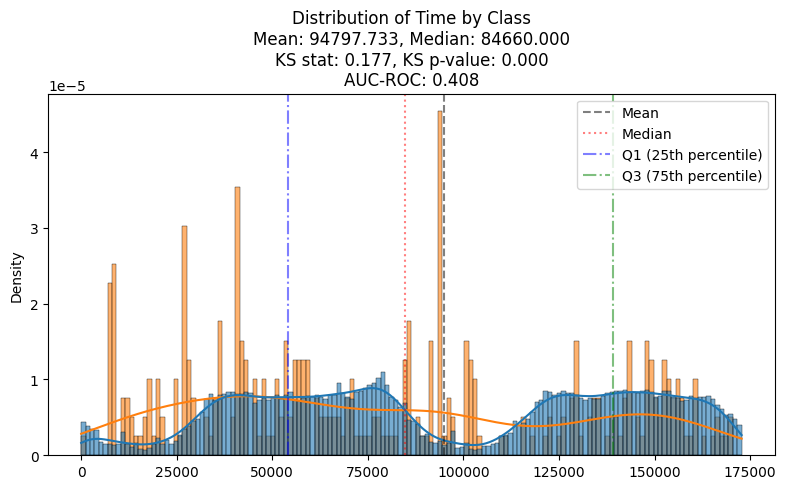

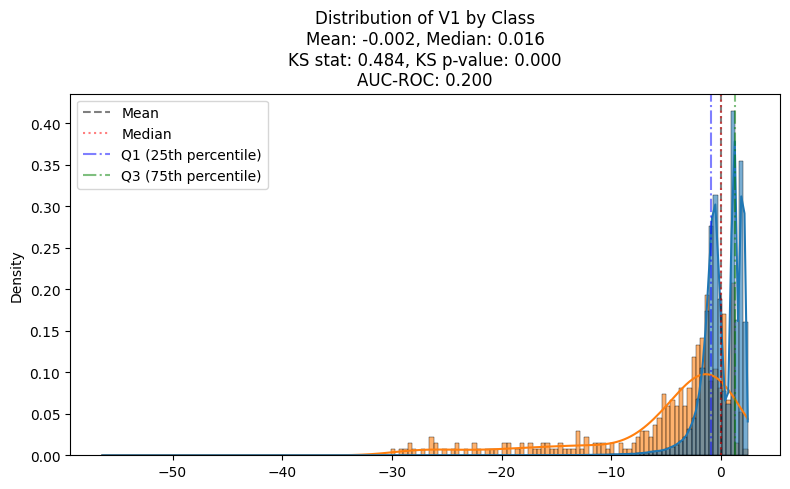

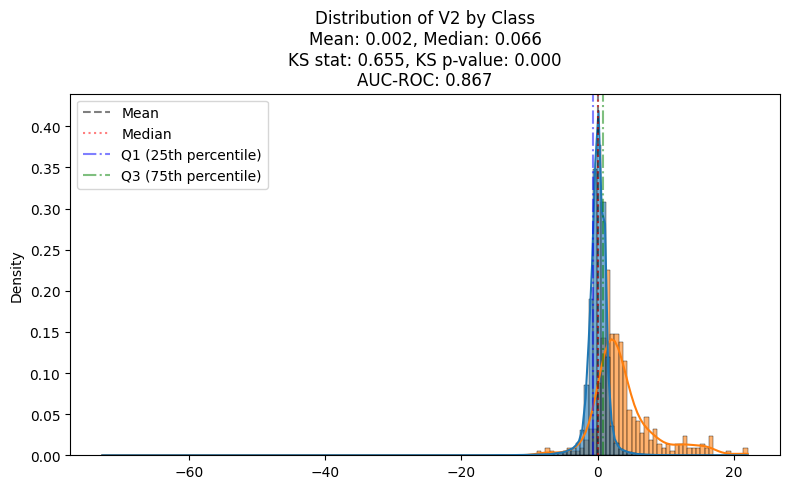

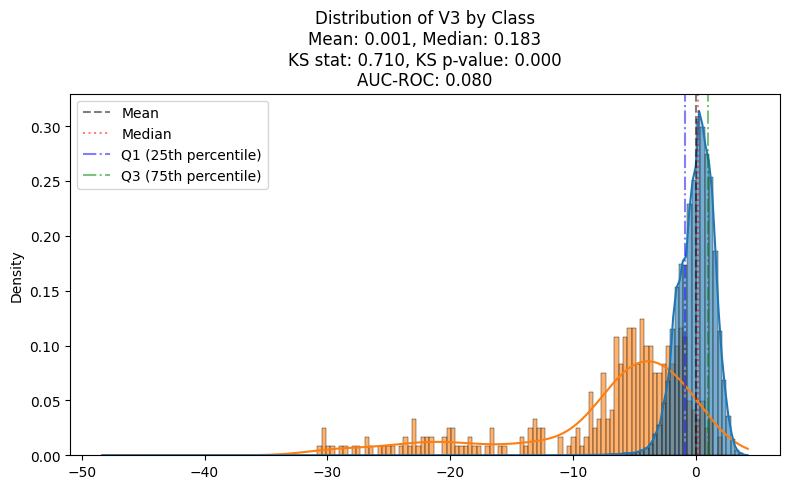

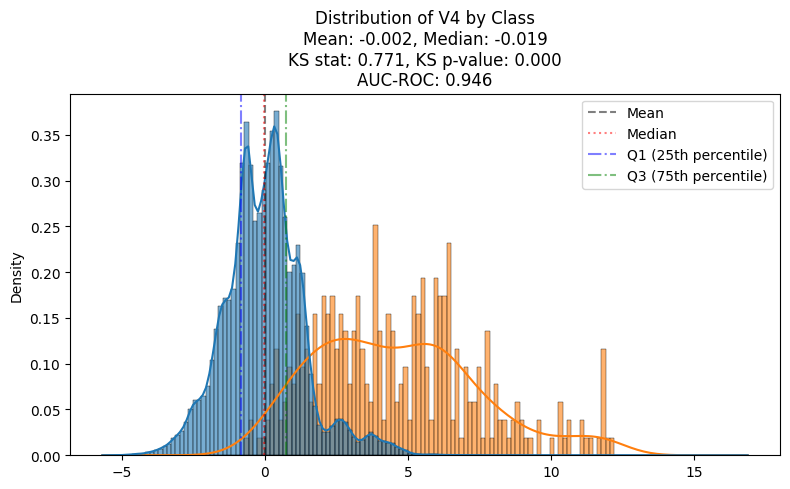

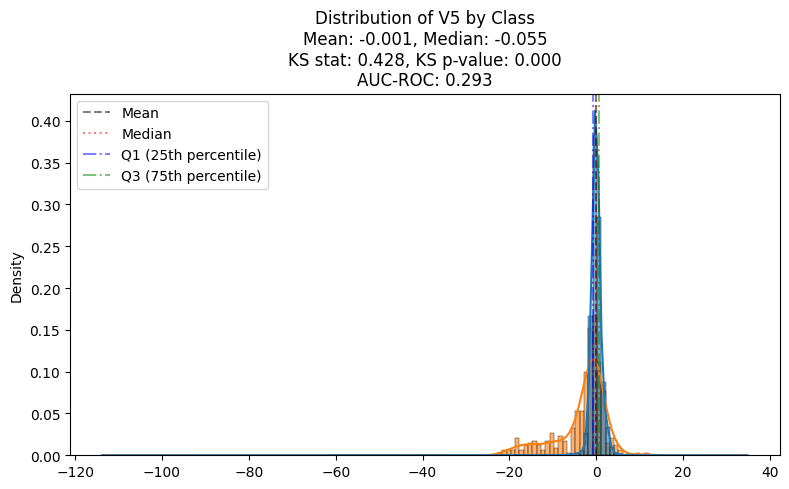

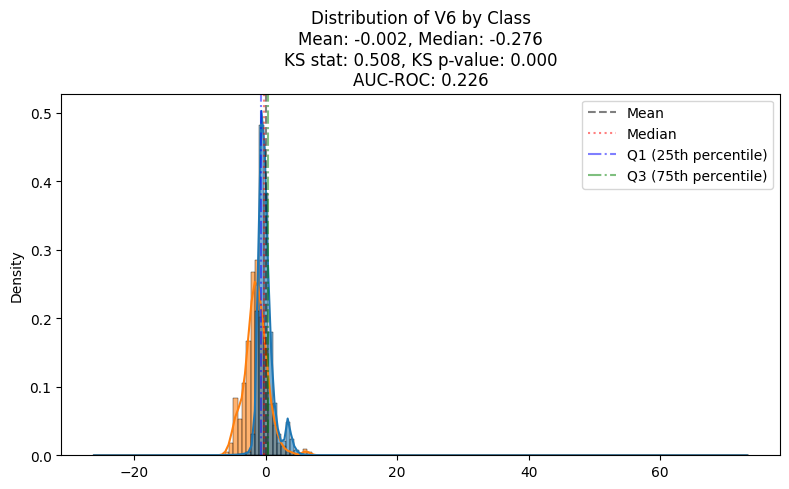

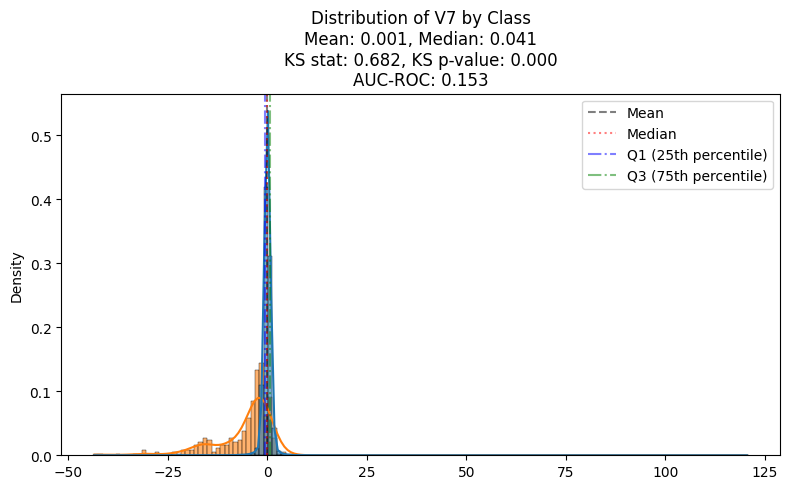

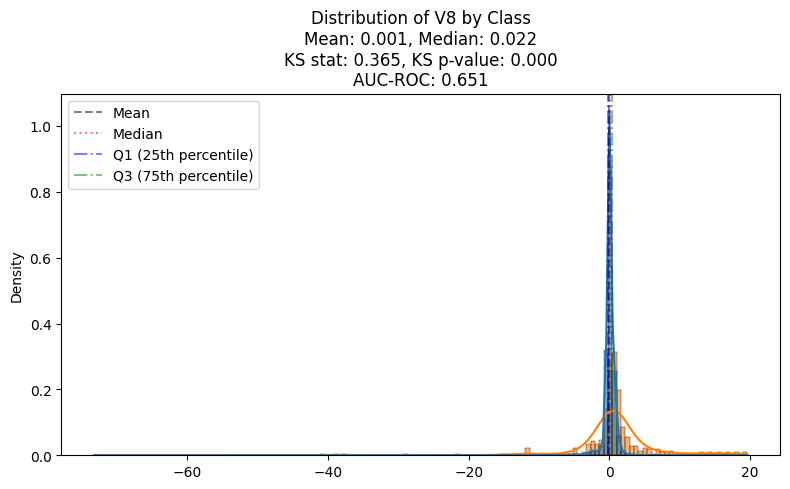

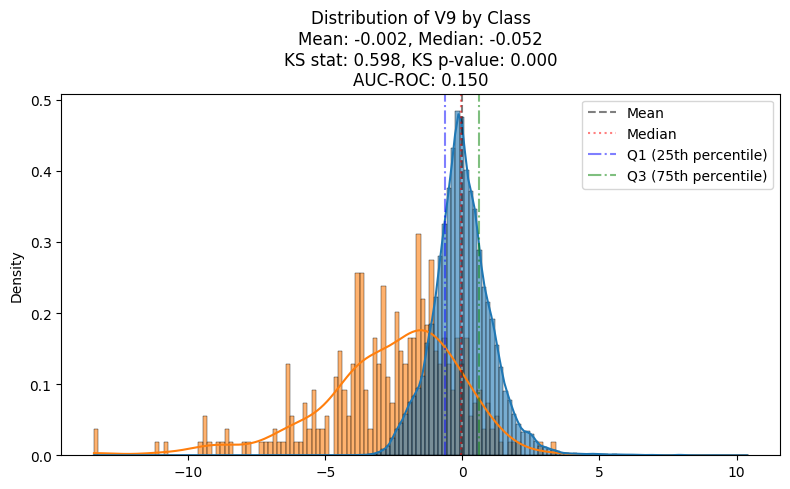

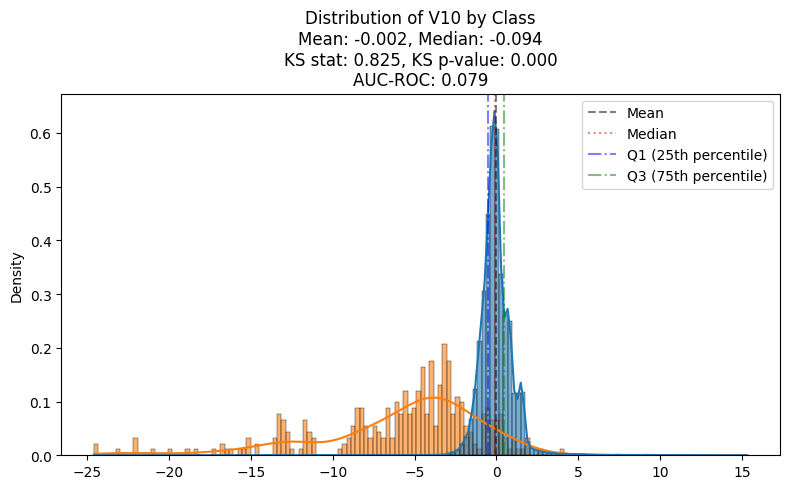

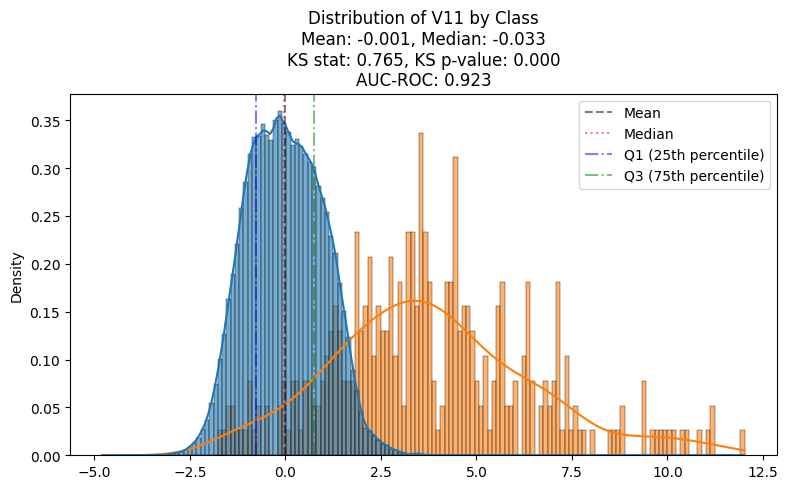

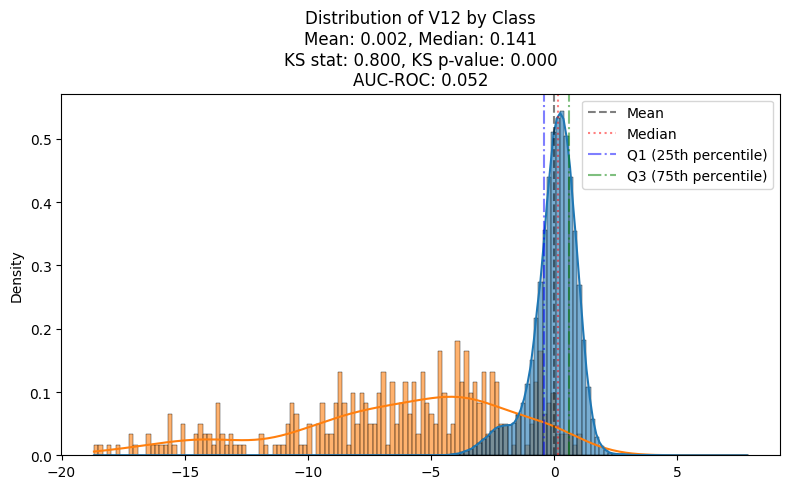

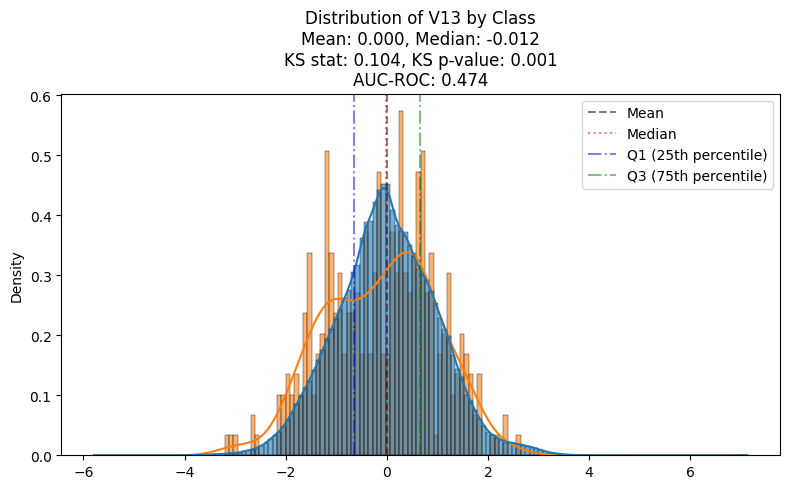

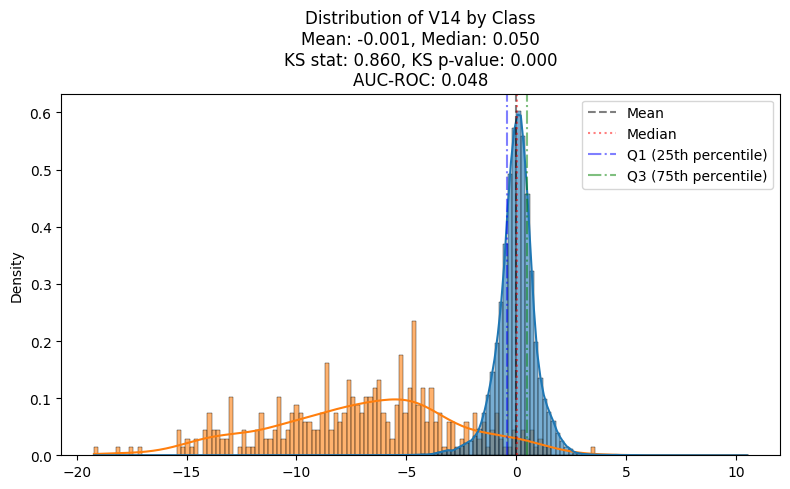

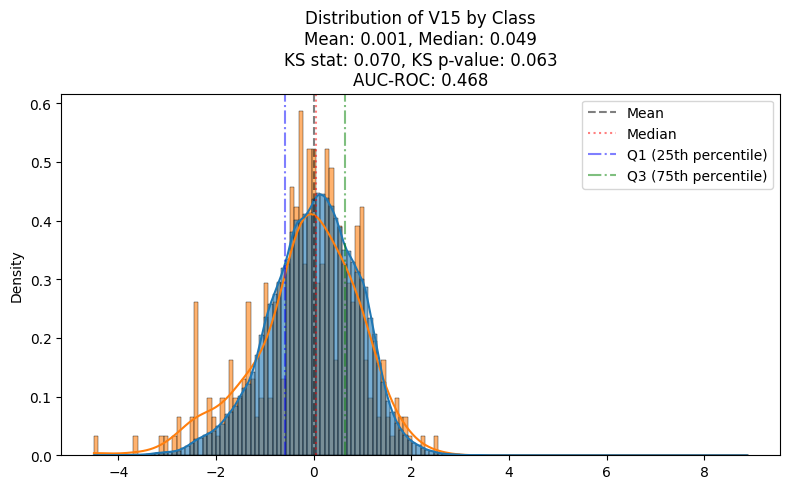

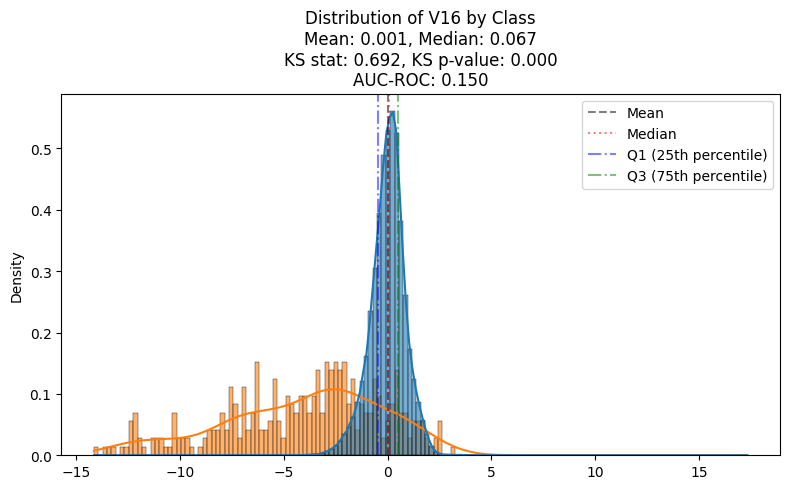

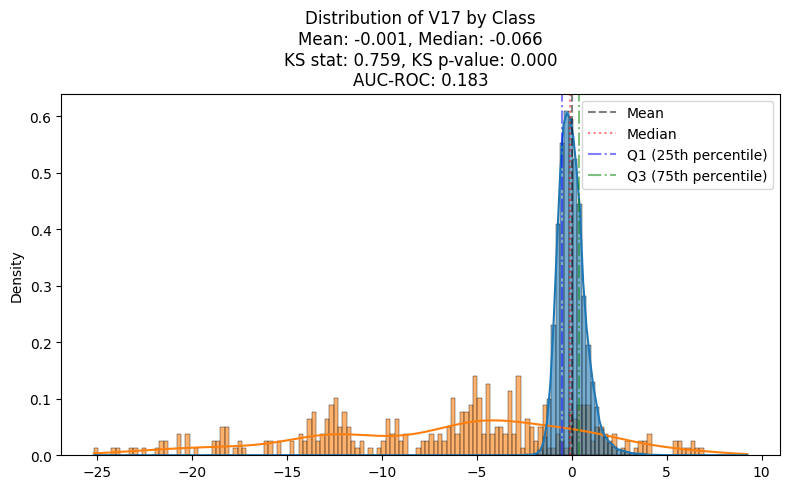

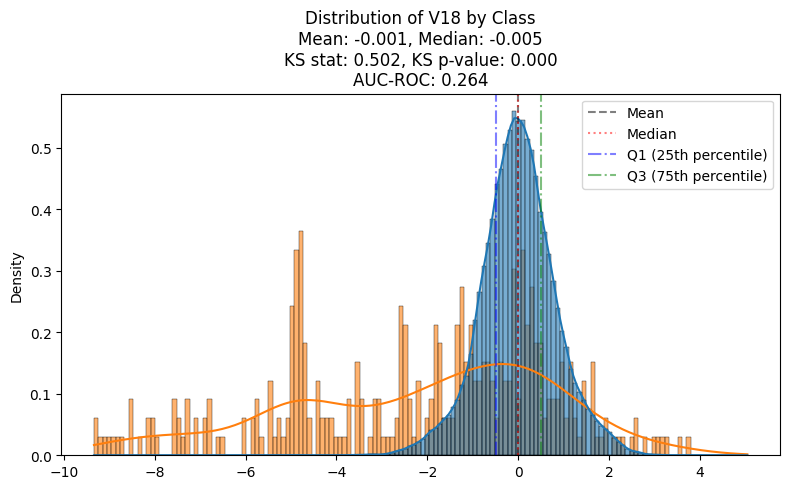

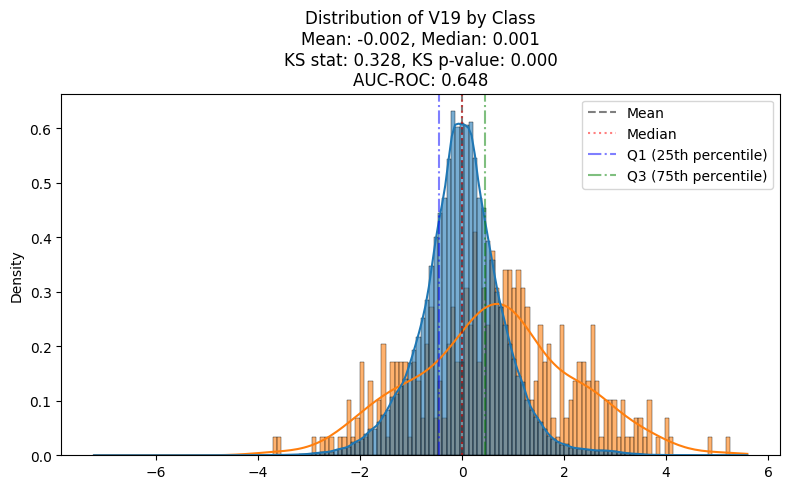

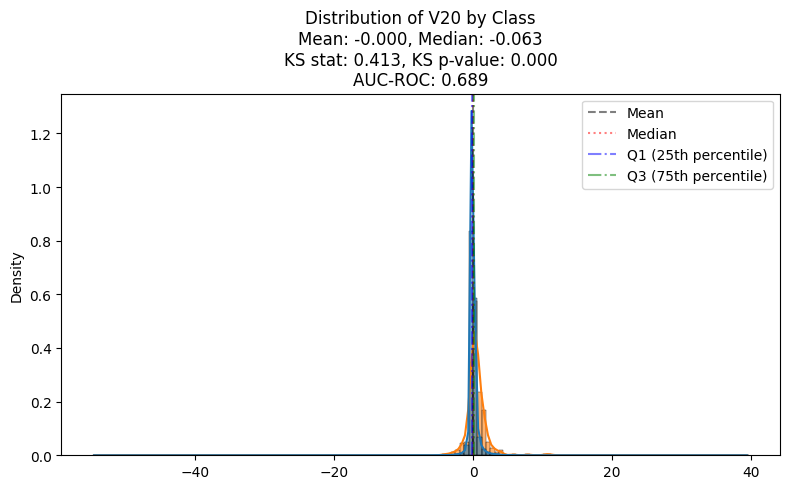

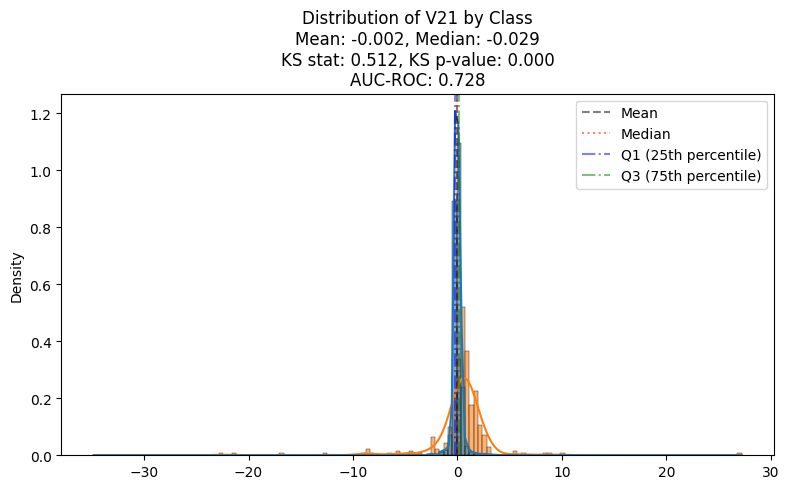

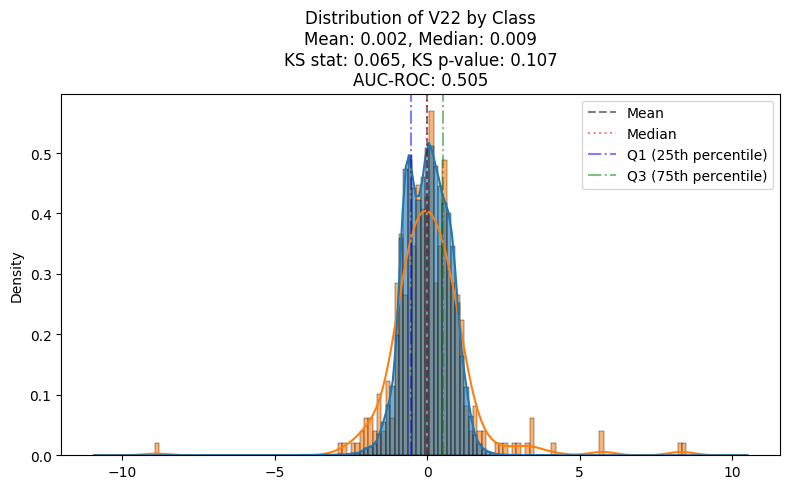

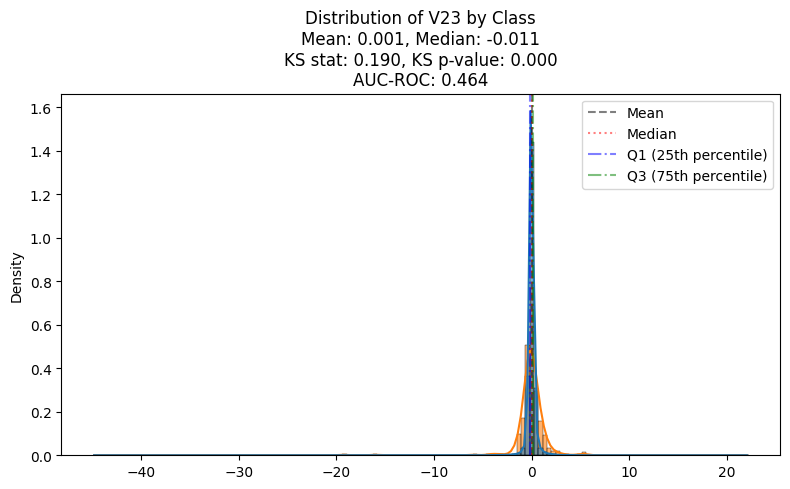

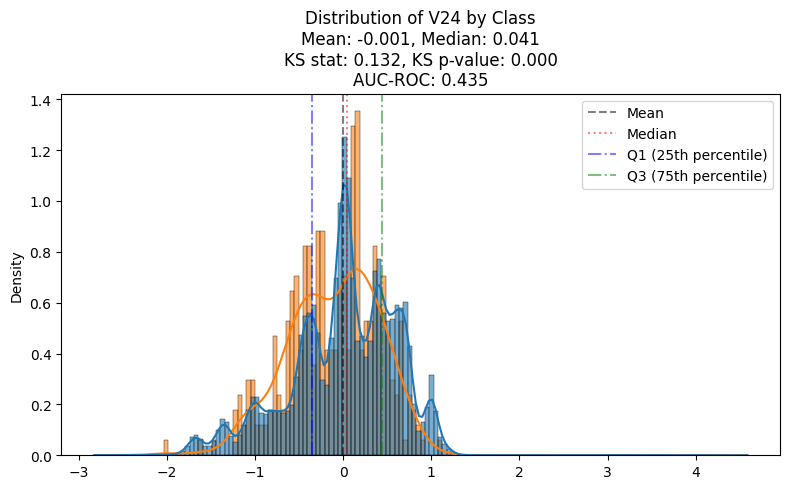

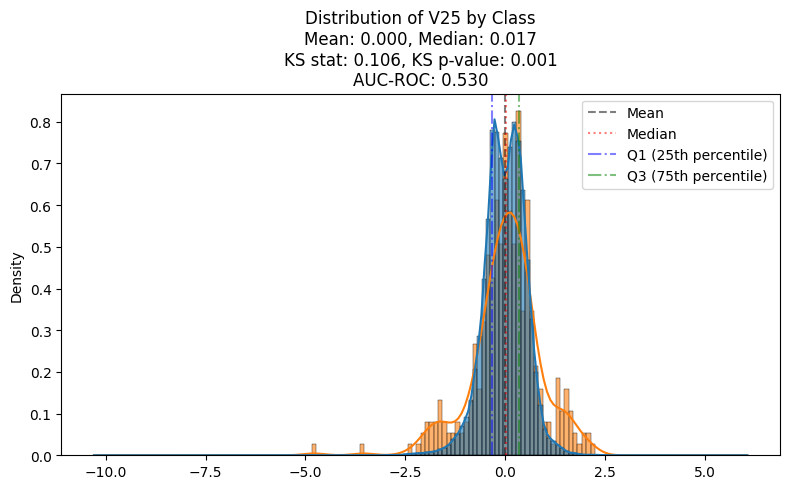

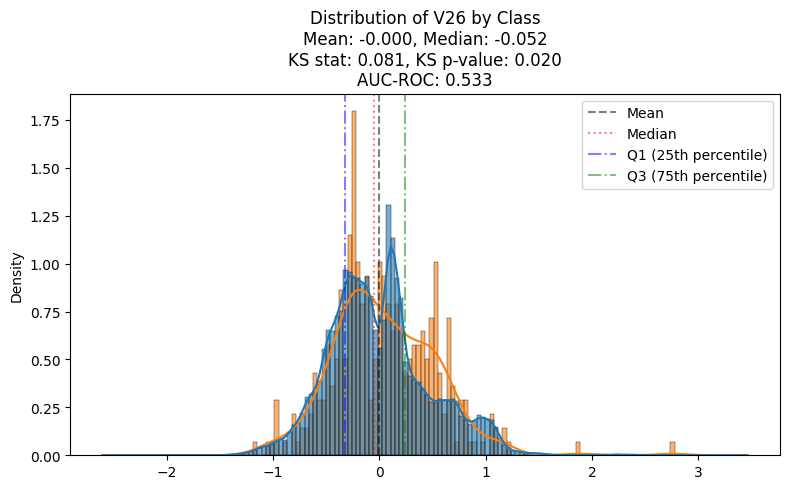

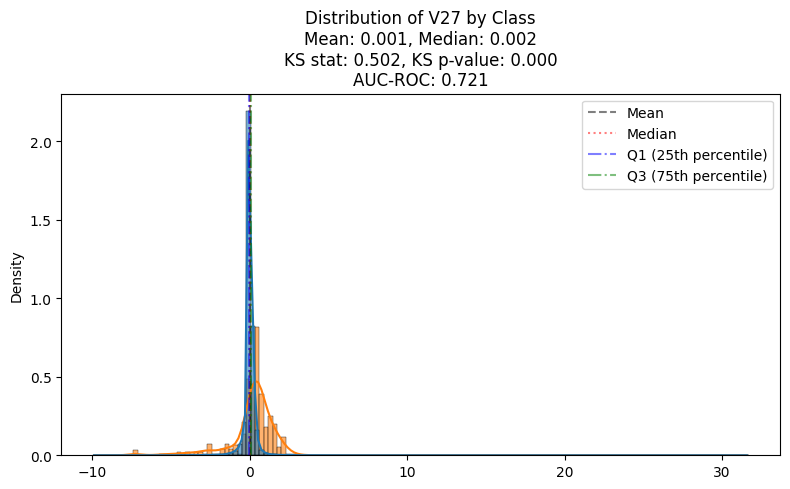

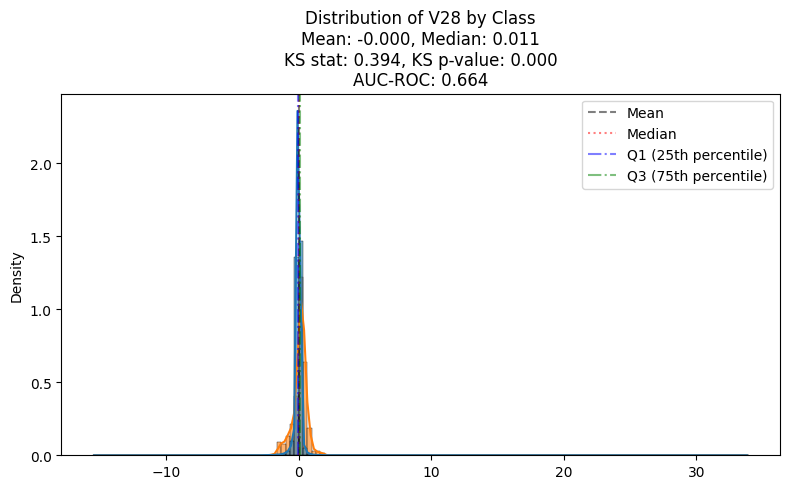

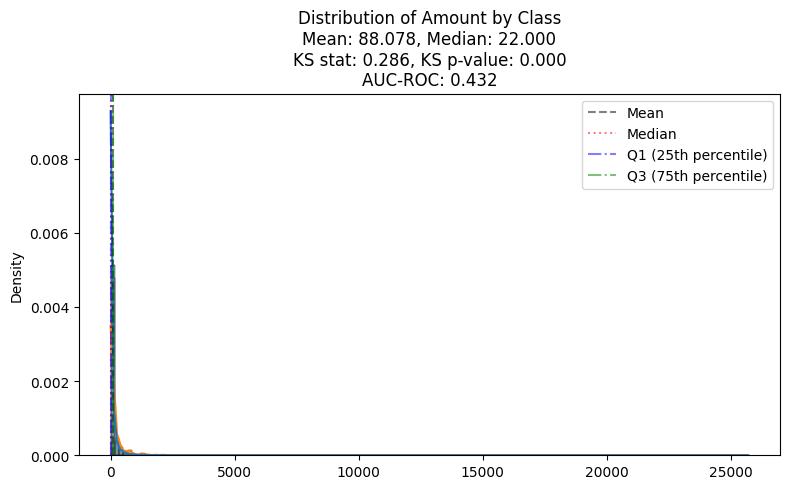

In [10]:
metrics = []
for col in df.columns[:-1]:
    metrics.append(plot_distribution(df, col, output_metrics=True))

In [11]:
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.sort_values(by='ks_stat', ascending=False)
df_metrics.head(40)

feature          mean        median   ks_stat        ks_pval   auc_roc
14     V14     -0.000943      0.049563  0.860382  4.383775e-293  0.048170
10     V10     -0.002078     -0.093738  0.825258  2.503348e-258  0.078998
12     V12      0.002071      0.140879  0.800339  4.332743e-237  0.051884
4       V4     -0.001755     -0.019303  0.770667  1.822753e-214  0.946330
11     V11     -0.000634     -0.032814  0.765354  1.139406e-210  0.922613
17     V17     -0.000758     -0.066054  0.759325  1.906271e-206  0.183113
3       V3      0.000655      0.183279  0.709572  1.396683e-174  0.080312
16     V16      0.001262      0.066865  0.692246  1.442739e-164  0.149837
7       V7      0.000607      0.041047  0.681801  9.119868e-159  0.153099
2       V2      0.001945      0.066110  0.654865  1.467903e-144  0.867010
9       V9     -0.001640     -0.052300  0.598489  6.103561e-118  0.149960
21     V21     -0.001691     -0.029021  0.512126   5.269484e-84  0.727853
6       V6     -0.002230     -0.275939  0.508453   1.009258e-82  0.226387
27     V27      0.001260      0.001616  0.501952   1.751850e-80  0.721244
18     V18     -0.000962     -0.004531  0.501834   1.922657e-80  0.263867
1       V1     -0.001913      0.016209  0.484289   1.375122e-74  0.199578
5       V5     -0.001228     -0.054666  0.427713   1.749743e-57  0.292587
20     V20     -0.000387     -0.062816  0.413473   1.387370e-53  0.688921
28     V28     -0.000289      0.011218  0.393775   1.898814e-48  0.663522
8       V8      0.000834      0.022356  0.364524   2.347955e-41  0.651201
19     V19     -0.001546      0.000580  0.328364   1.923388e-33  0.647958
29  Amount     88.077695     22.000000  0.286299   2.223070e-25  0.431607
23     V23      0.000817     -0.011070  0.189634   2.828715e-11  0.463581
0     Time  94797.732921  84660.000000  0.176819   7.499268e-10  0.408486
24     V24     -0.000774      0.040869  0.132072   1.119245e-05  0.434538
25     V25      0.000025      0.017126  0.106280   7.918817e-04  0.530134
13     V13      0.000390     -0.011678  0.103901   1.119251e-03  0.473781
26     V26     -0.000117     -0.052104  0.081414   2.000115e-02  0.532791
15     V15      0.000821      0.049394  0.070498   6.298550e-02  0.468177
22     V22      0.001527      0.008607  0.064861   1.067673e-01  0.505376

### Adasyn Dataset

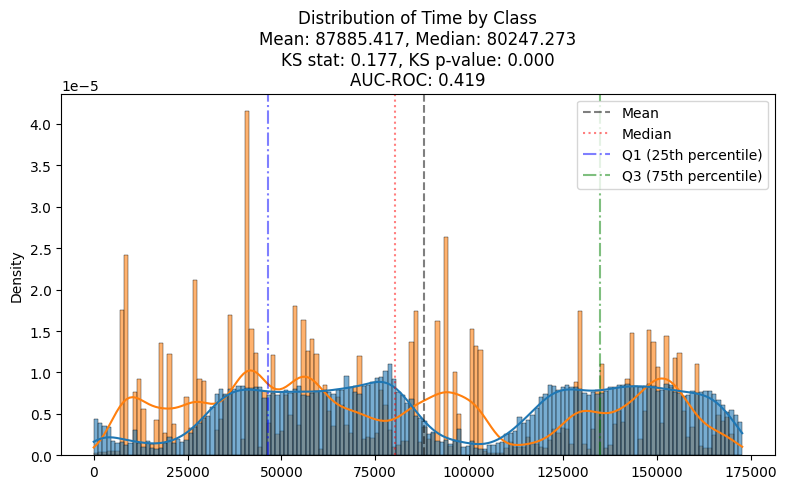

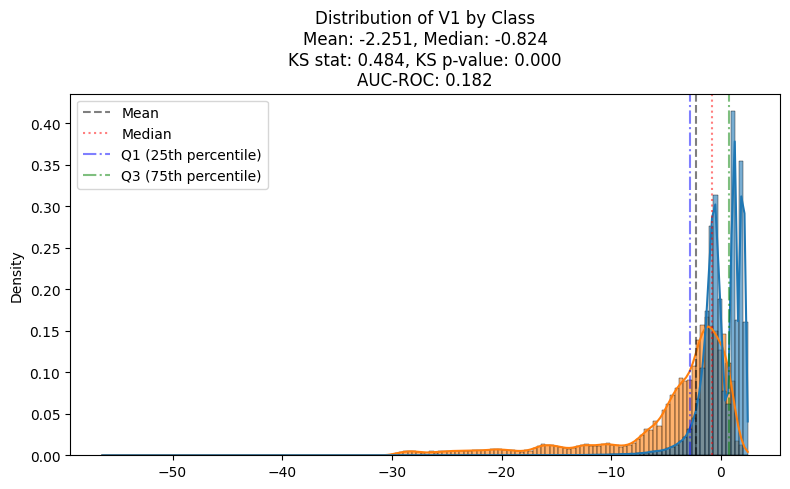

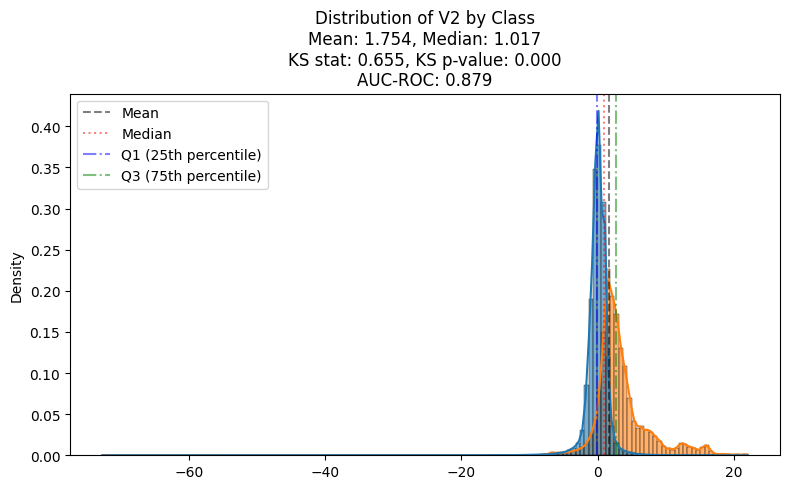

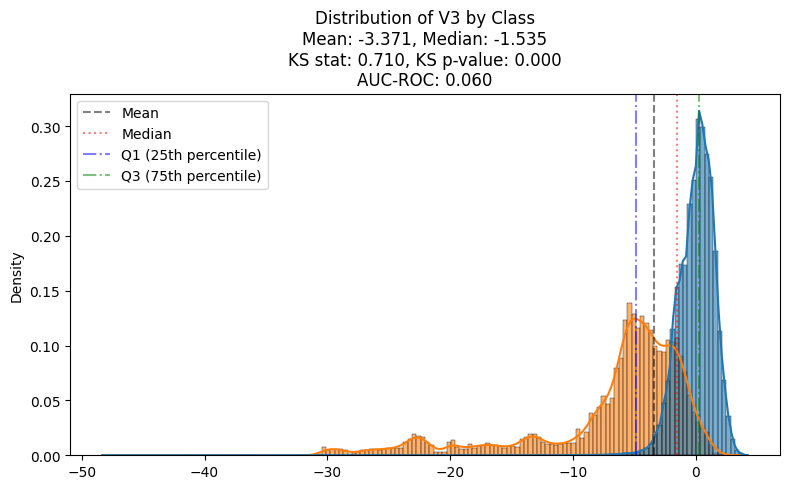

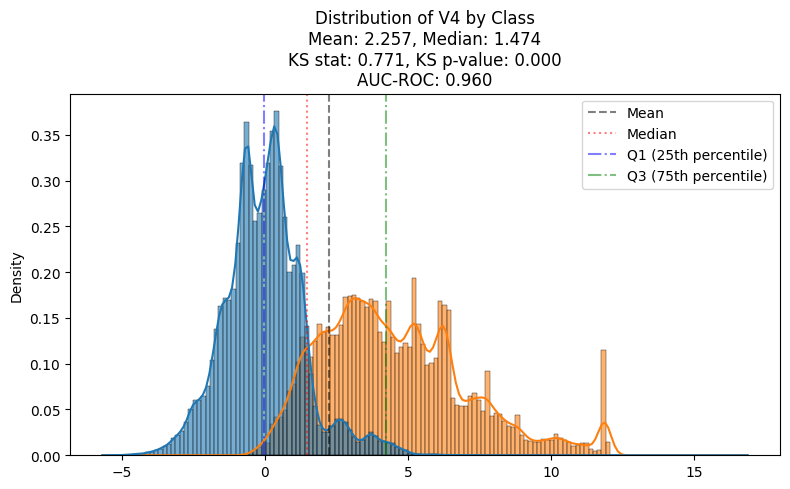

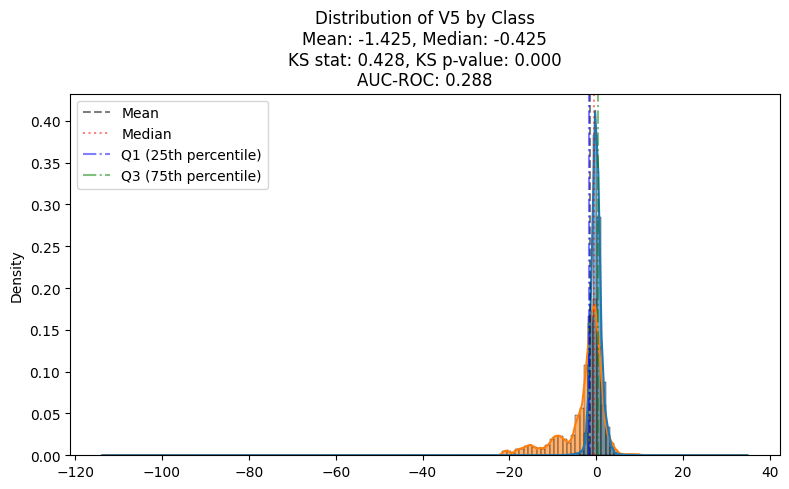

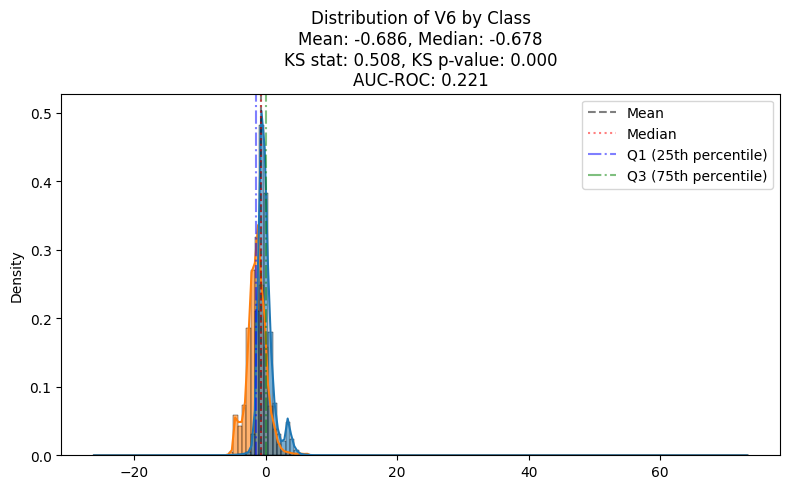

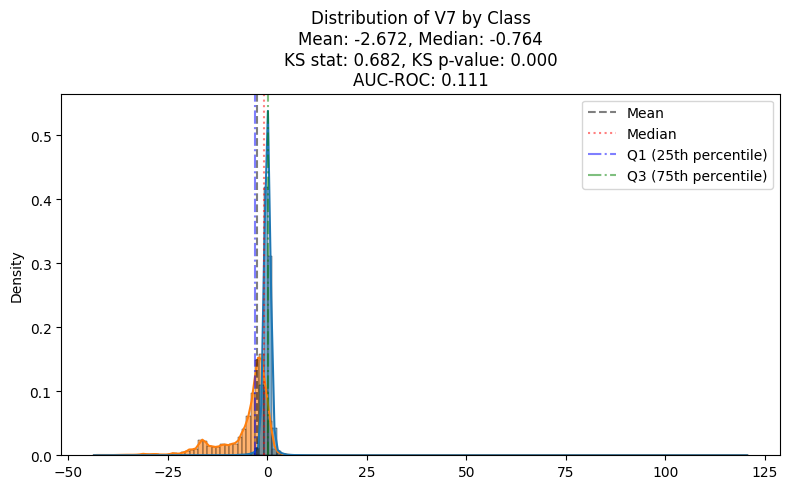

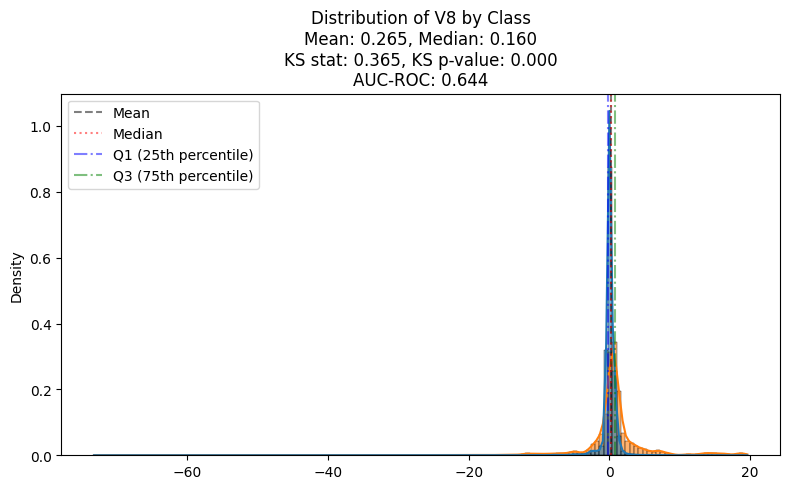

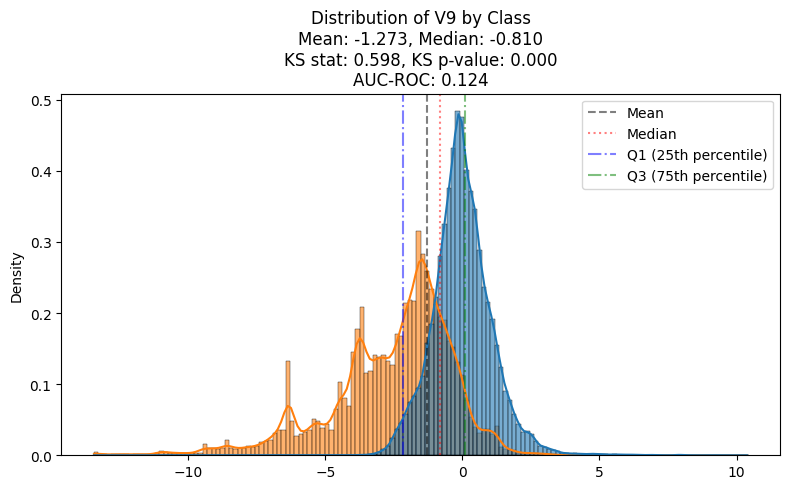

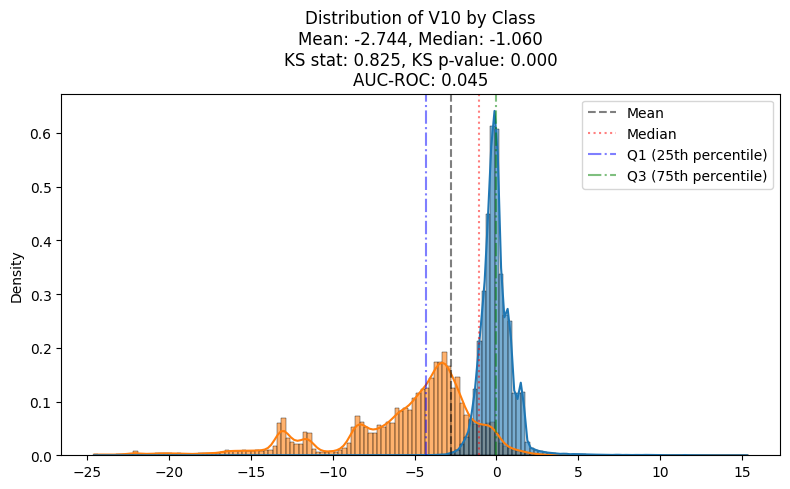

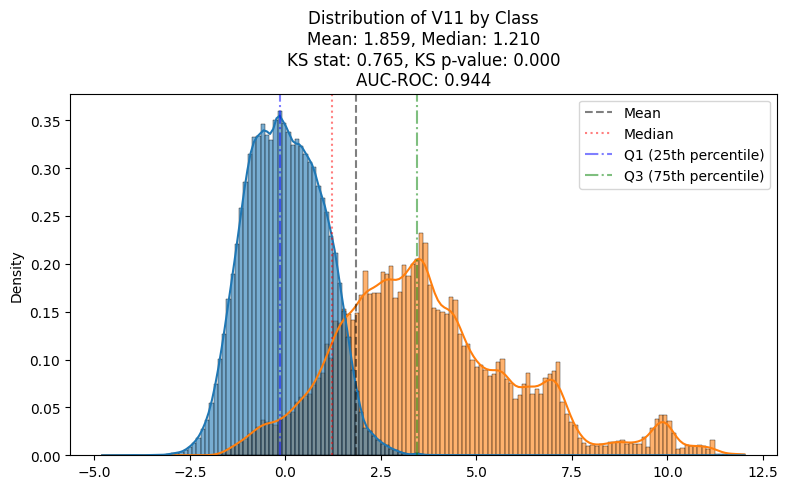

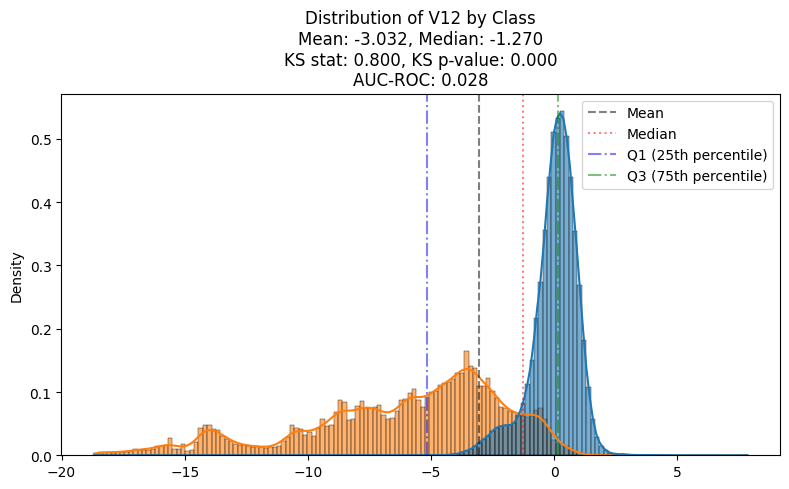

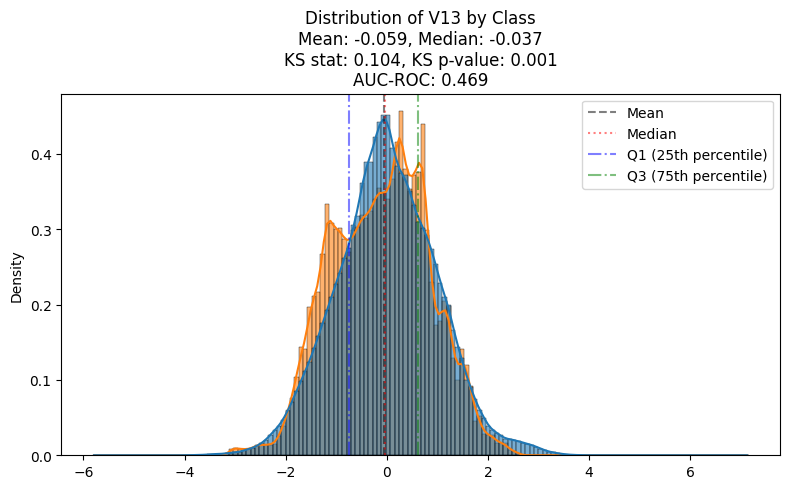

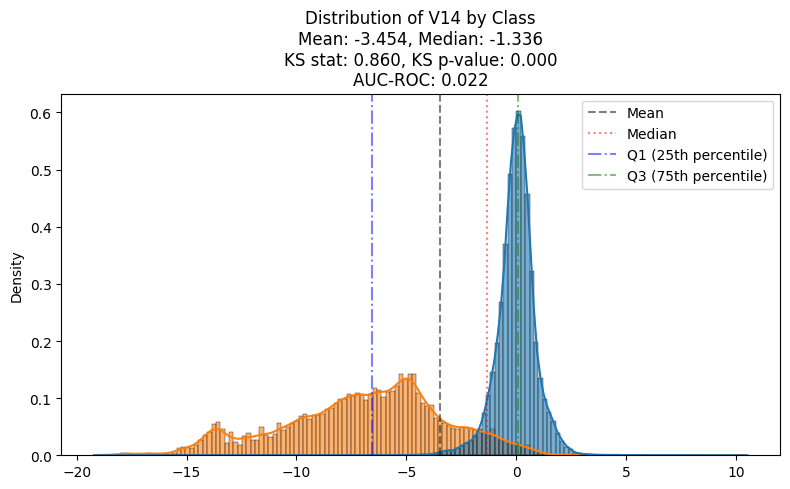

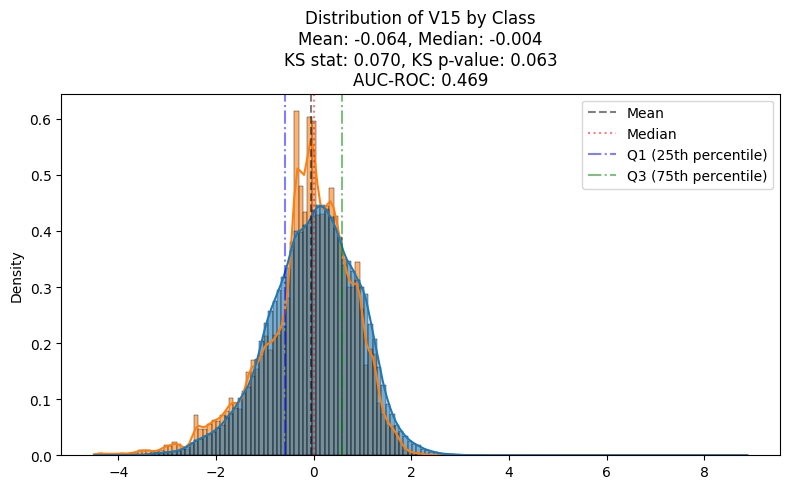

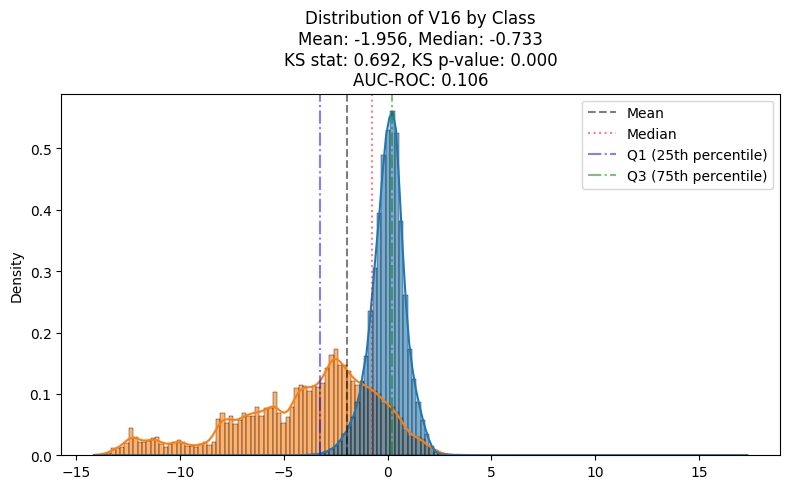

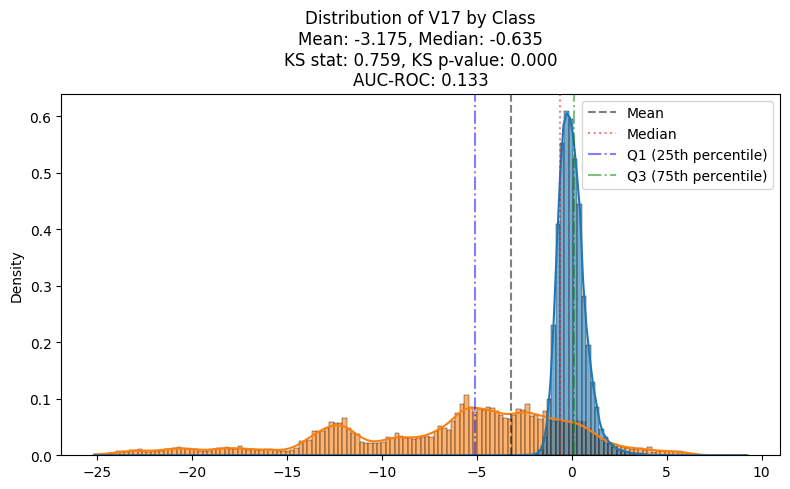

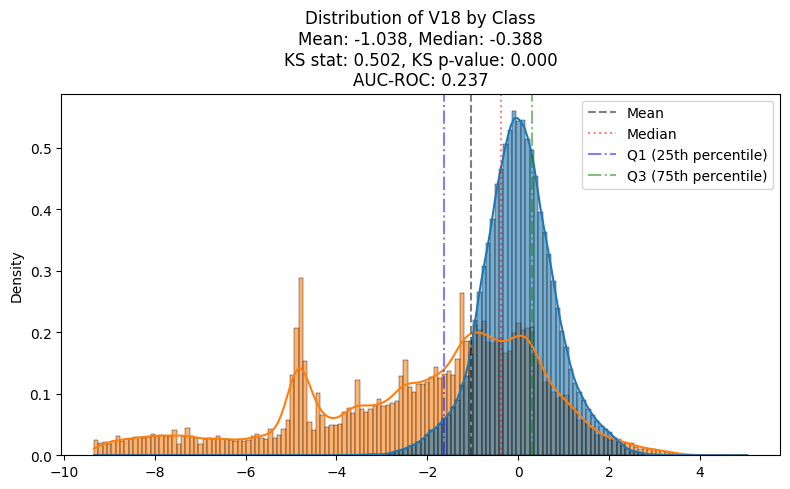

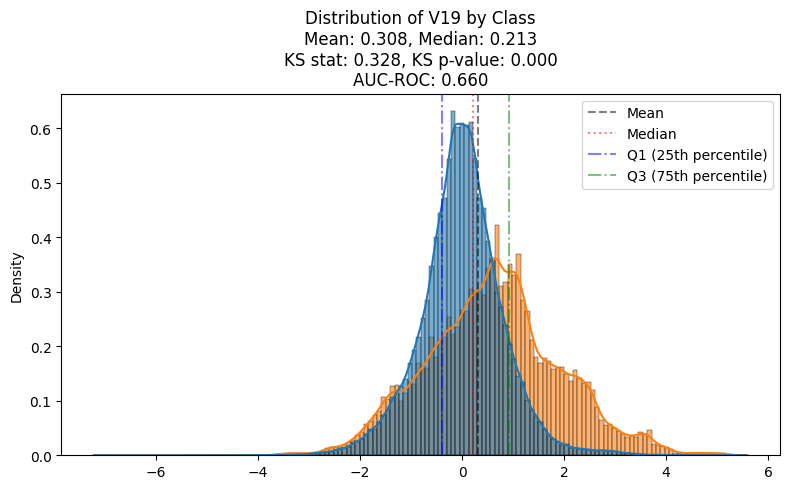

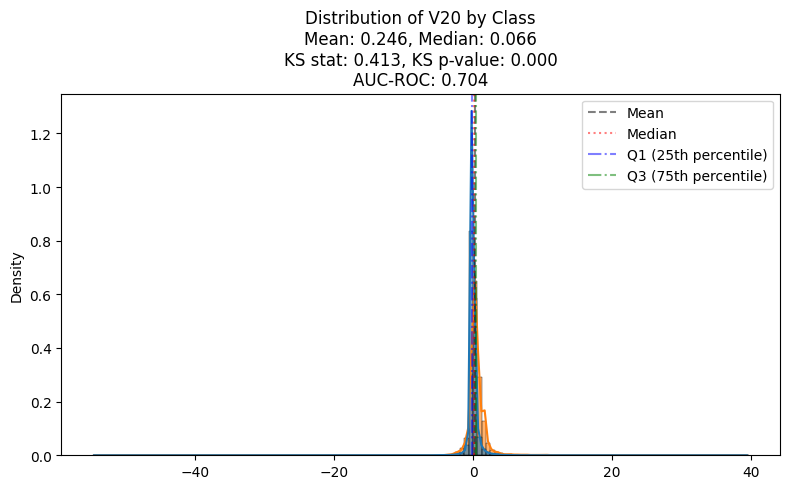

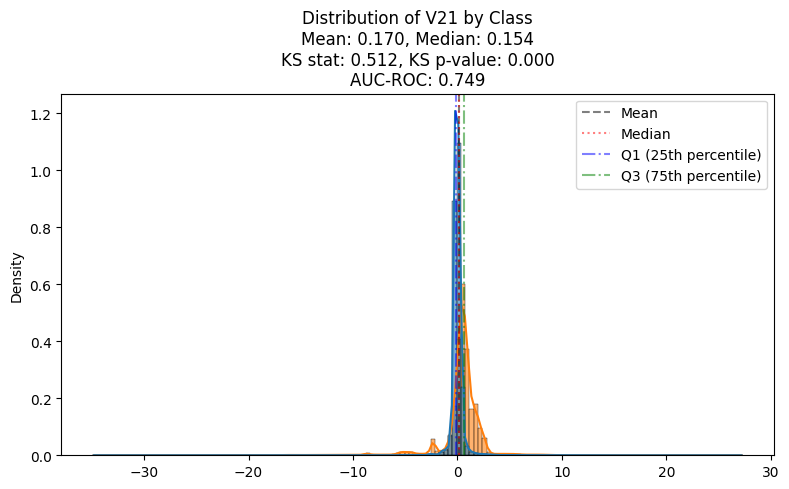

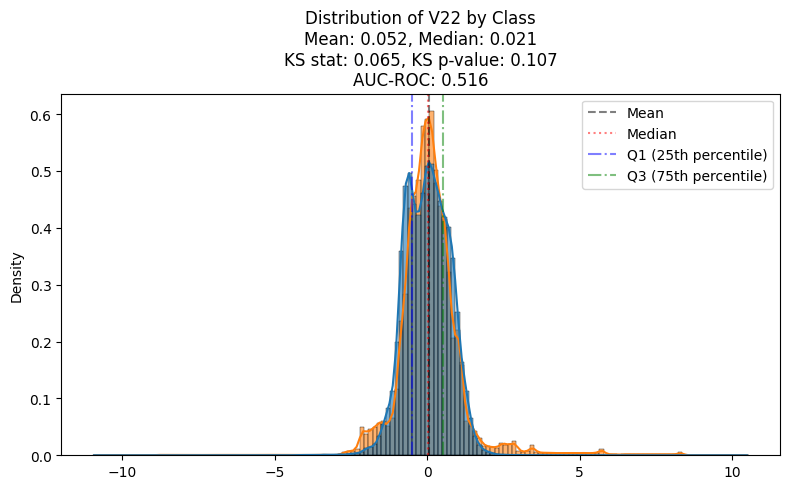

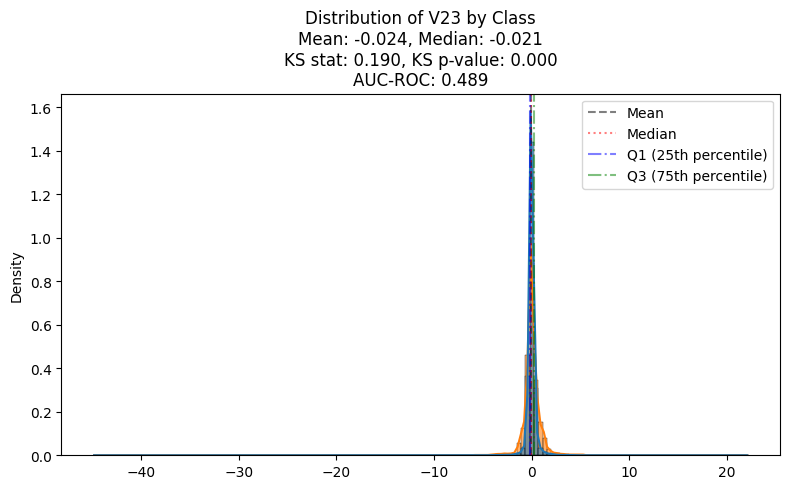

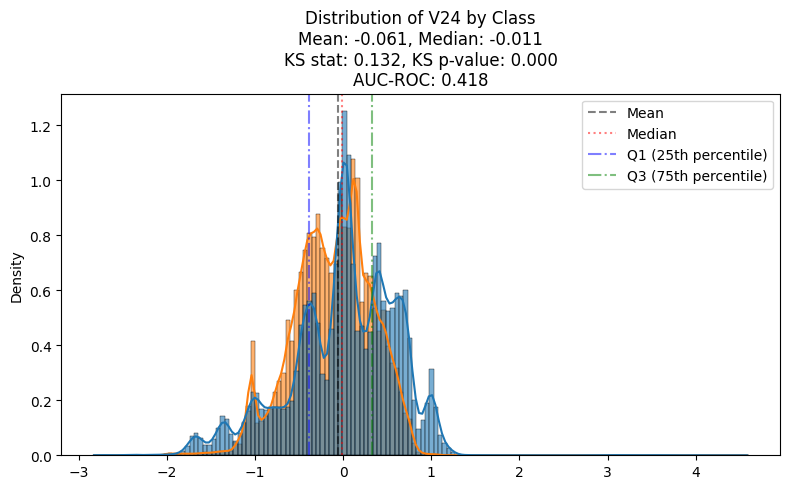

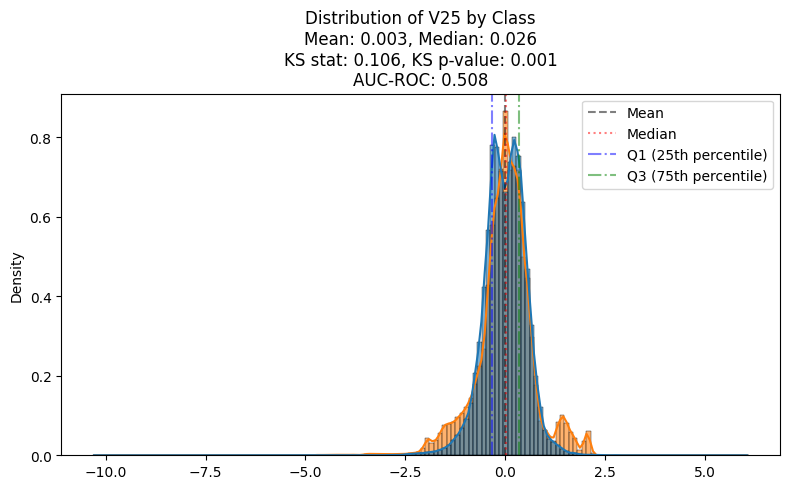

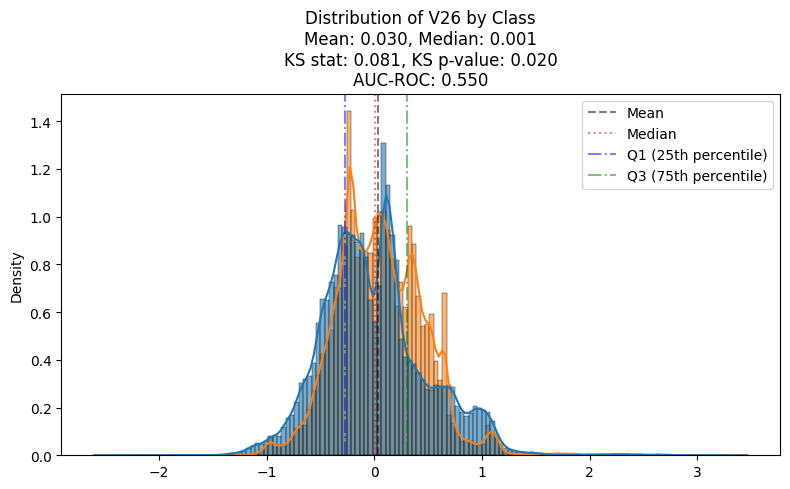

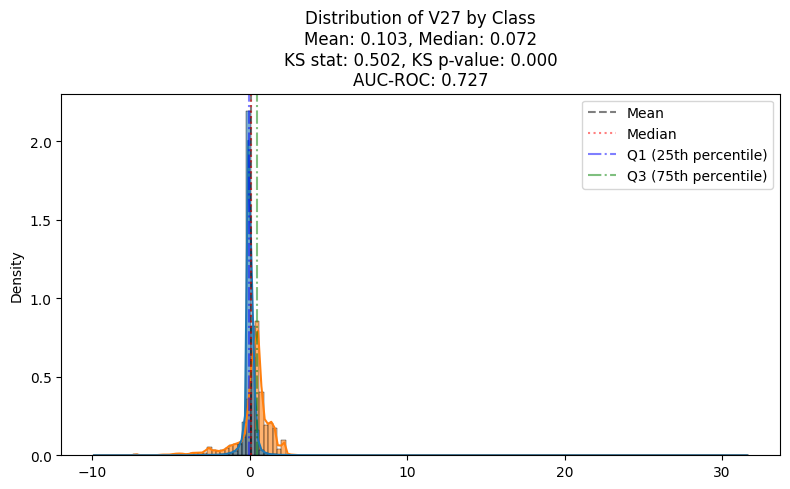

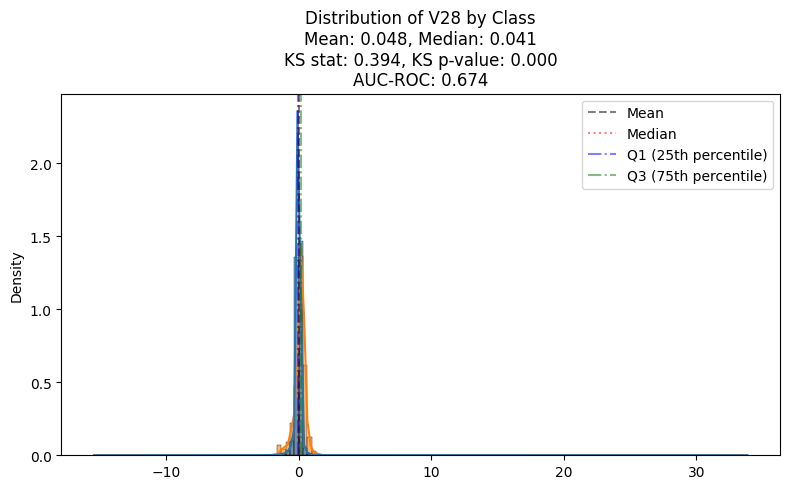

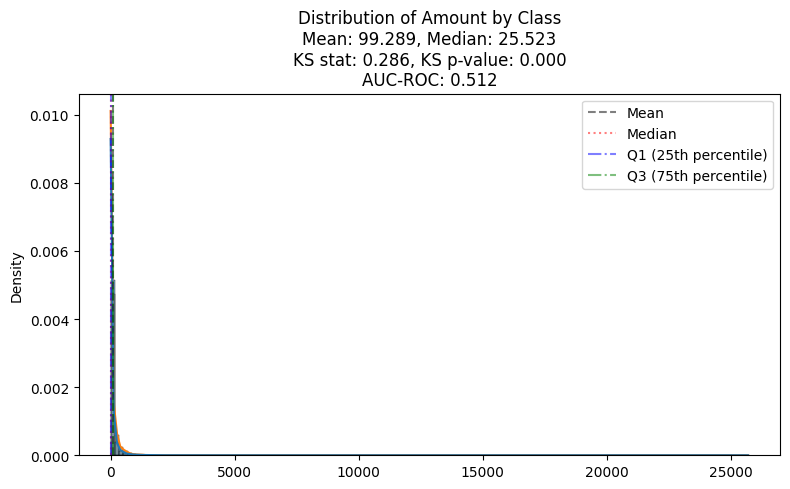

In [12]:
metrics = []
for col in df.columns[:-1]:
    metrics.append(plot_distribution(df_ada, col, output_metrics=True))

In [13]:
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.sort_values(by='ks_stat', ascending=False)
df_metrics.head(40)

feature          mean        median   ks_stat        ks_pval   auc_roc
14     V14     -3.454243     -1.335927  0.860382  4.383775e-293  0.022348
10     V10     -2.743709     -1.059790  0.825258  2.503348e-258  0.045043
12     V12     -3.031524     -1.270224  0.800339  4.332743e-237  0.027967
4       V4      2.257417      1.474284  0.770667  1.822753e-214  0.960434
11     V11      1.858888      1.209898  0.765354  1.139406e-210  0.943608
17     V17     -3.175072     -0.635384  0.759325  1.906271e-206  0.132591
3       V3     -3.371135     -1.535250  0.709572  1.396683e-174  0.059752
16     V16     -1.955868     -0.732609  0.692246  1.442739e-164  0.106394
7       V7     -2.671506     -0.764179  0.681801  9.119868e-159  0.111037
2       V2      1.753570      1.016982  0.654865  1.467903e-144  0.879060
9       V9     -1.273064     -0.810428  0.598489  6.103561e-118  0.123937
21     V21      0.169951      0.153684  0.512126   5.269484e-84  0.749297
6       V6     -0.686300     -0.677772  0.508453   1.009258e-82  0.220821
27     V27      0.103366      0.071676  0.501952   1.751850e-80  0.727228
18     V18     -1.037991     -0.387603  0.501834   1.922657e-80  0.237145
1       V1     -2.250564     -0.824293  0.484289   1.375122e-74  0.182308
5       V5     -1.424573     -0.424750  0.427713   1.749743e-57  0.288003
20     V20      0.245839      0.065651  0.413473   1.387370e-53  0.704403
28     V28      0.048426      0.041374  0.393775   1.898814e-48  0.673573
8       V8      0.265255      0.159622  0.364524   2.347955e-41  0.643804
19     V19      0.307582      0.213222  0.328364   1.923388e-33  0.660003
29  Amount     99.289024     25.523233  0.286299   2.223070e-25  0.511726
23     V23     -0.024019     -0.021187  0.189634   2.828715e-11  0.488570
0     Time  87885.416955  80247.272671  0.176819   7.499268e-10  0.419127
24     V24     -0.060714     -0.011177  0.132072   1.119245e-05  0.417892
25     V25      0.002809      0.026046  0.106280   7.918817e-04  0.508054
13     V13     -0.058889     -0.037137  0.103901   1.119251e-03  0.469404
26     V26      0.029910      0.001429  0.081414   2.000115e-02  0.549606
15     V15     -0.063501     -0.003731  0.070498   6.298550e-02  0.468974
22     V22      0.051536      0.021136  0.064861   1.067673e-01  0.515609

### SMOTE

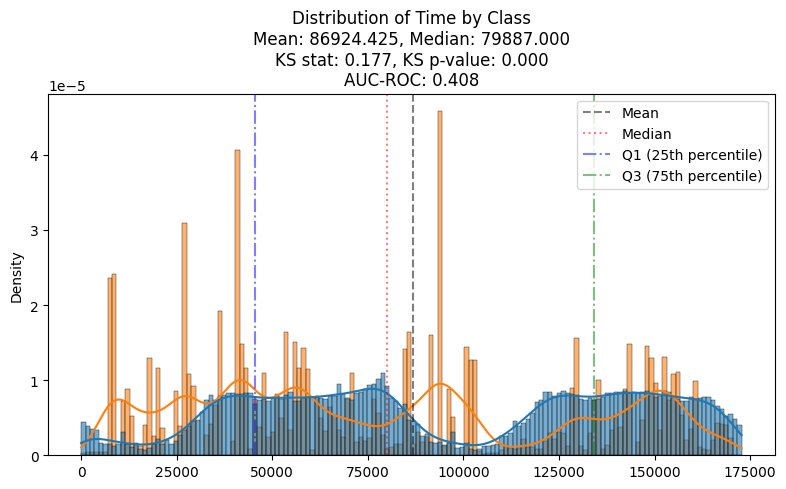

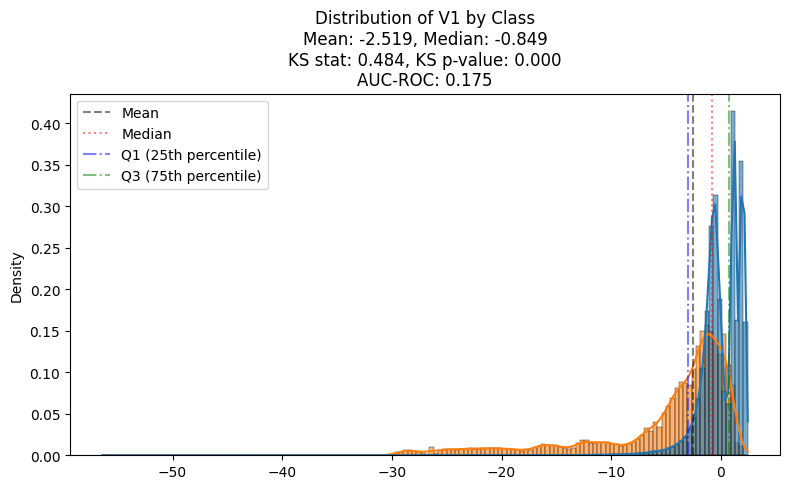

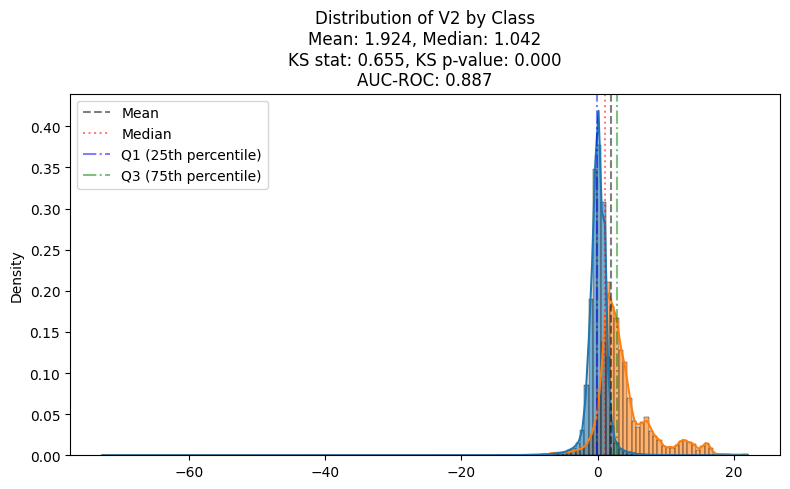

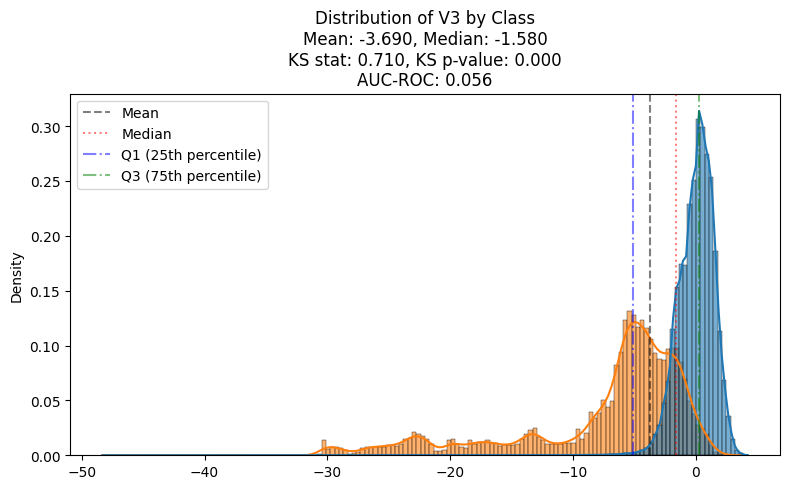

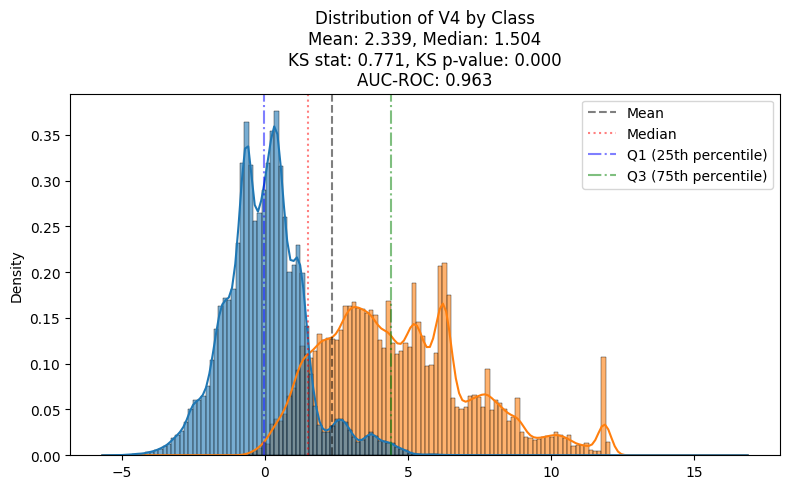

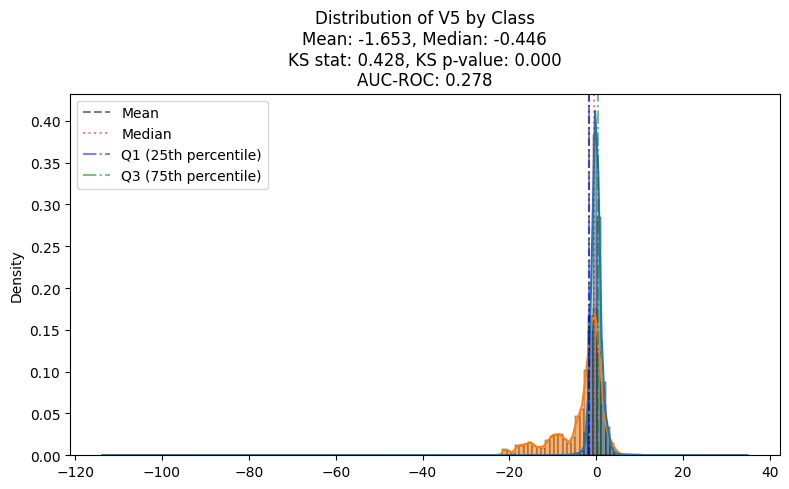

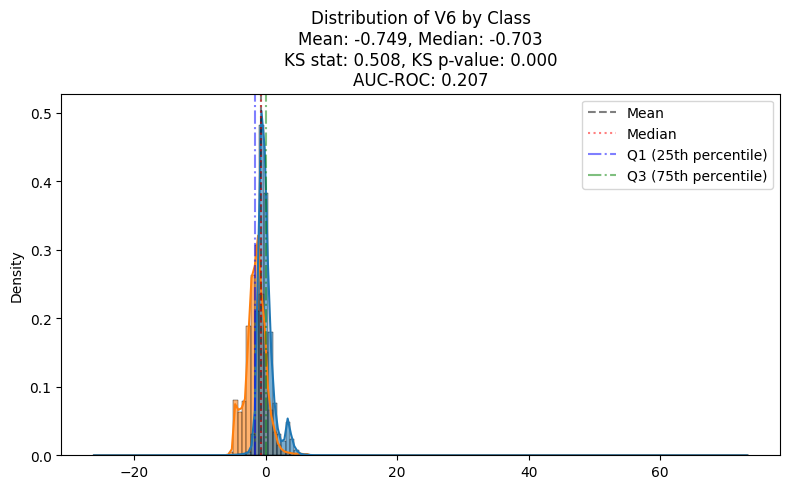

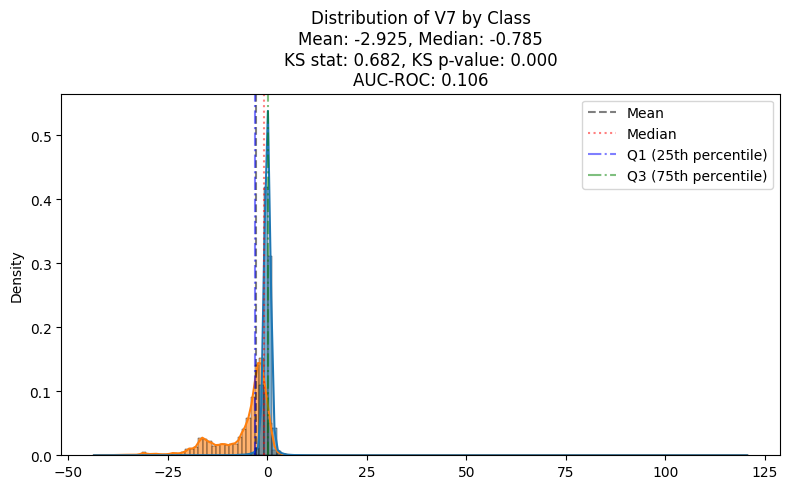

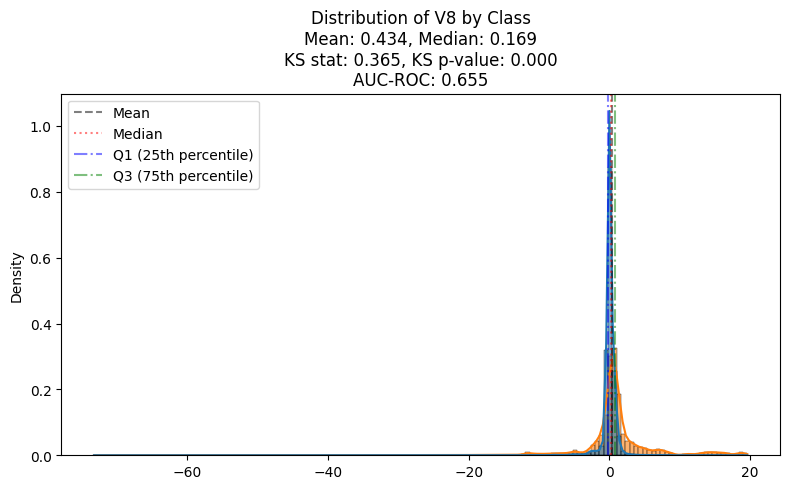

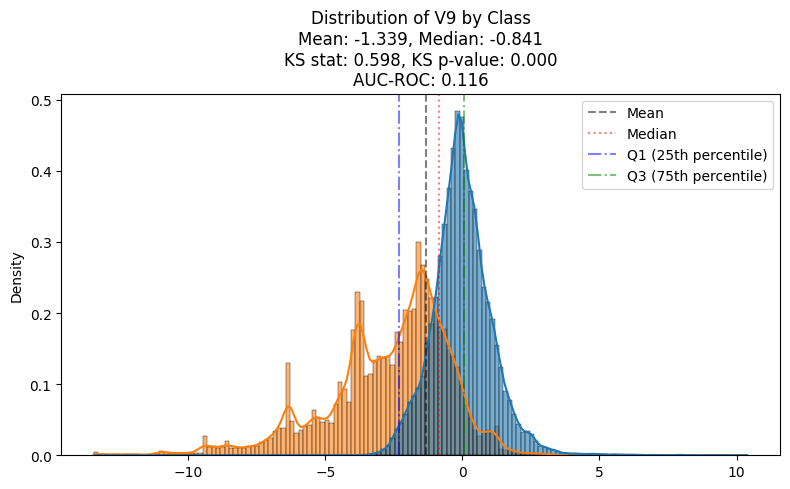

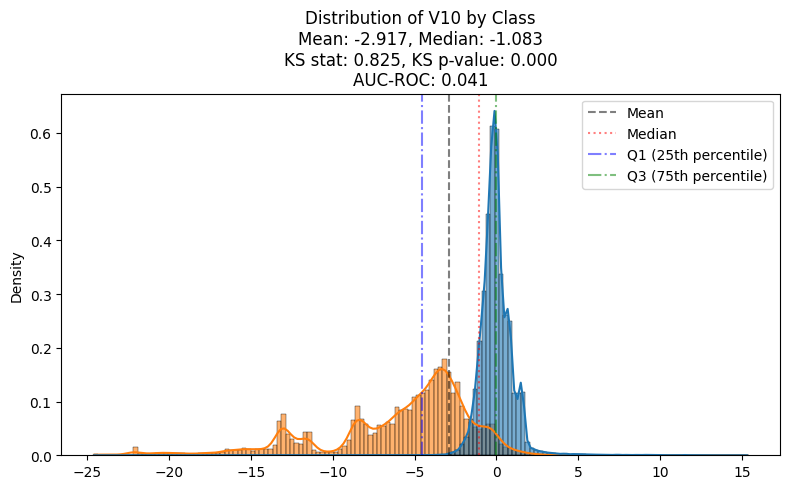

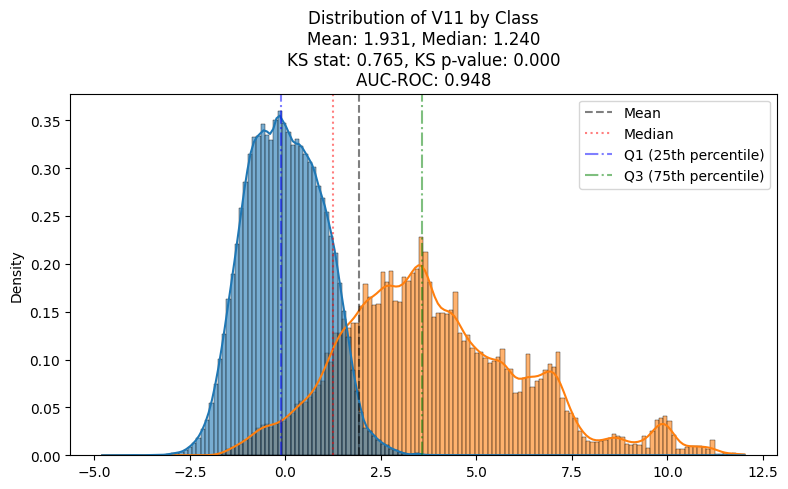

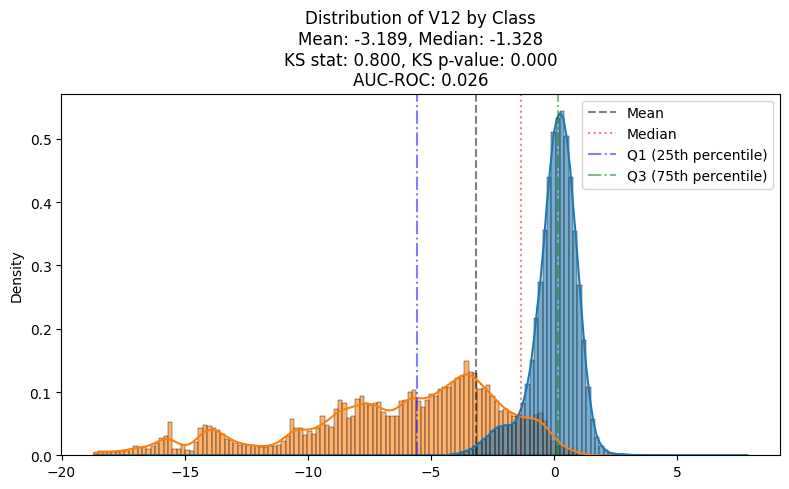

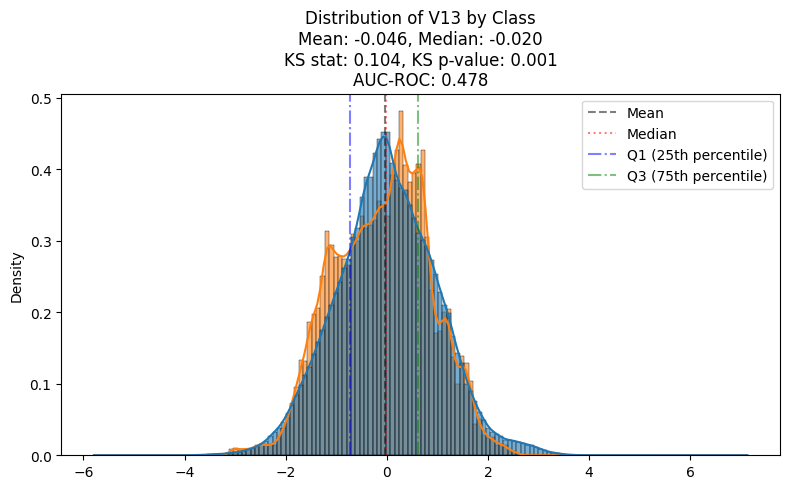

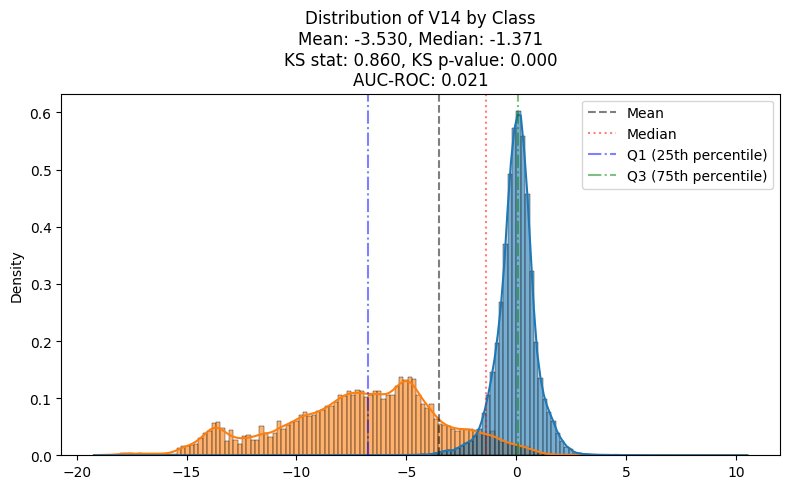

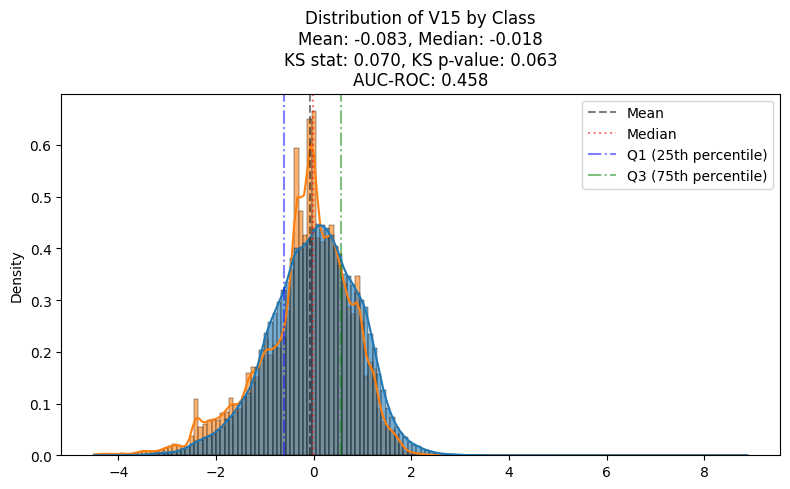

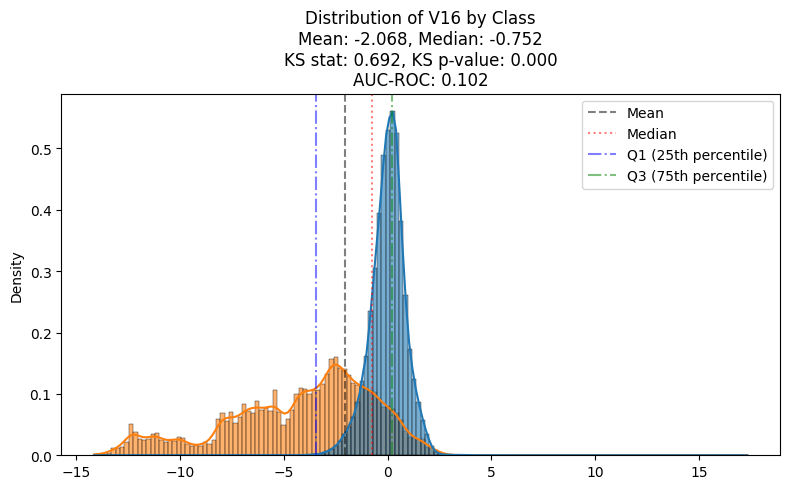

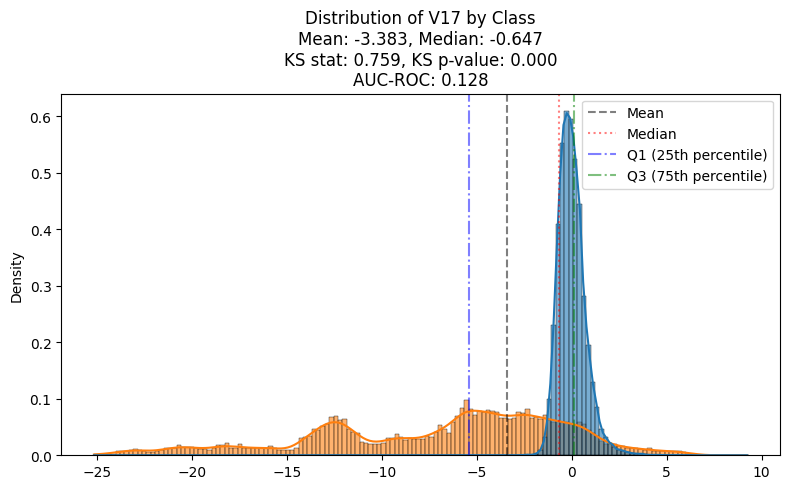

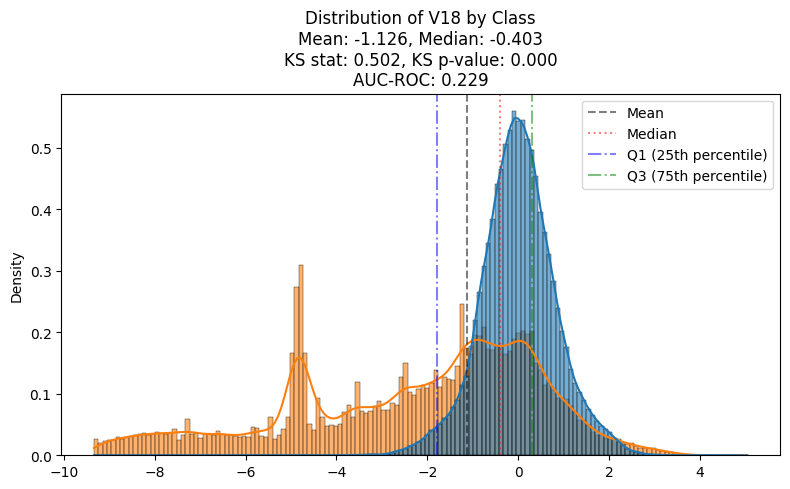

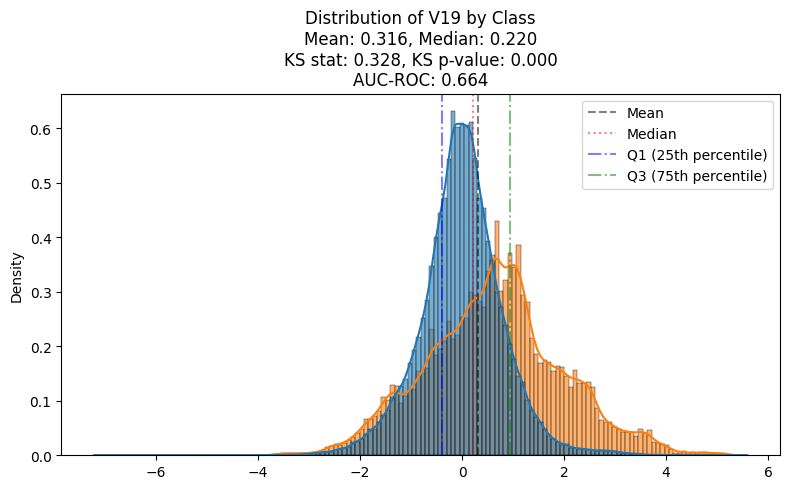

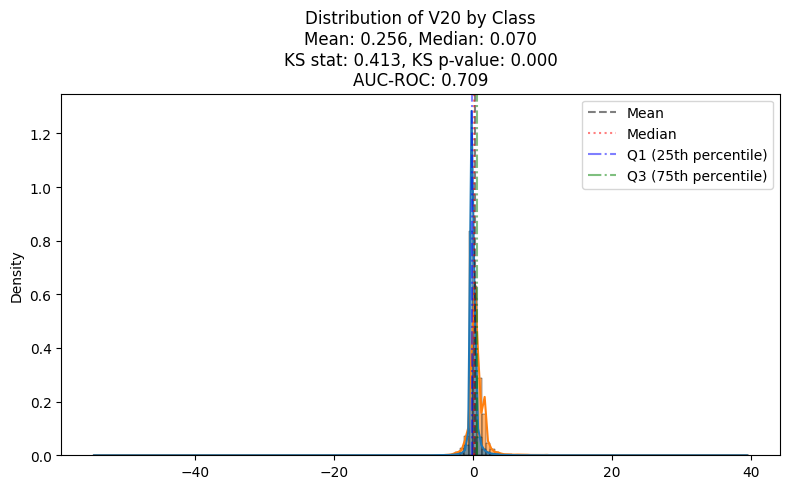

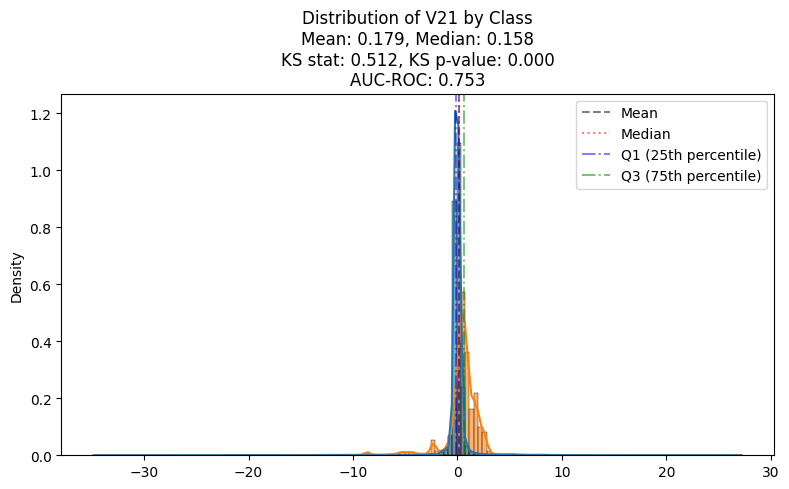

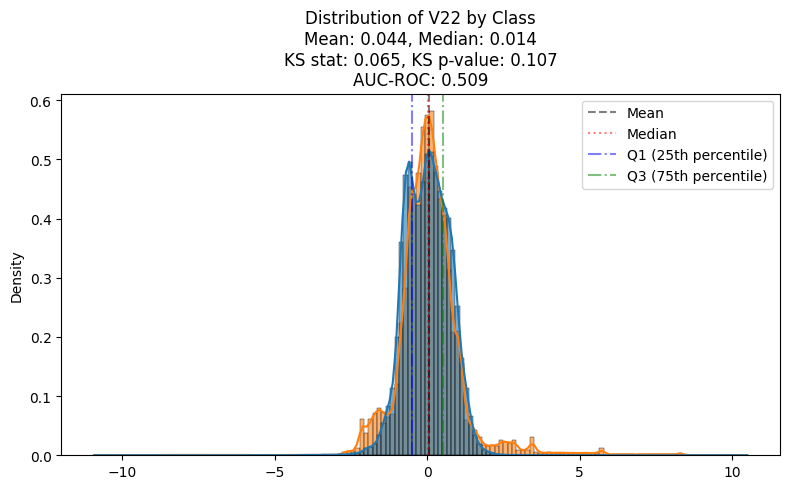

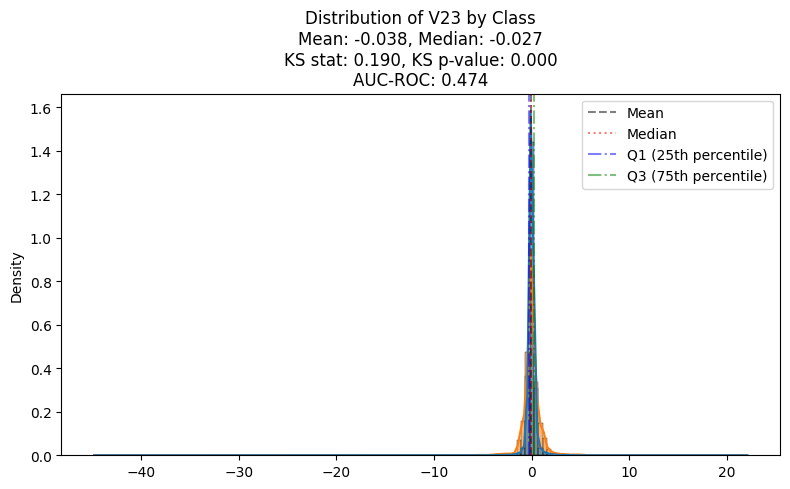

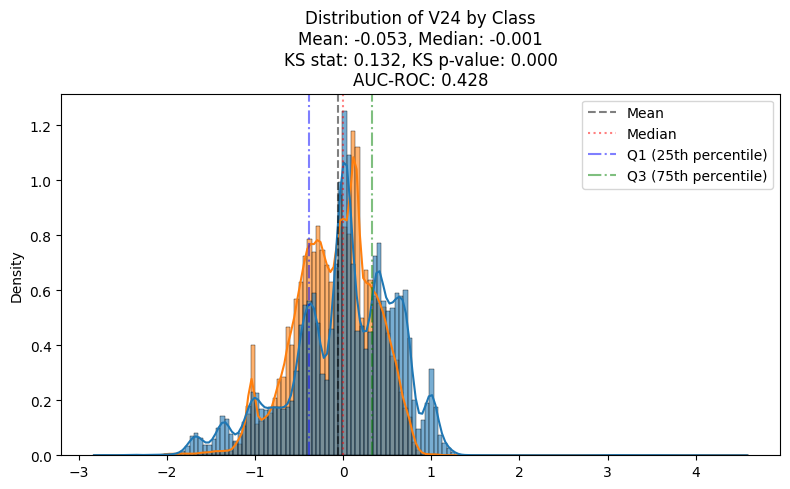

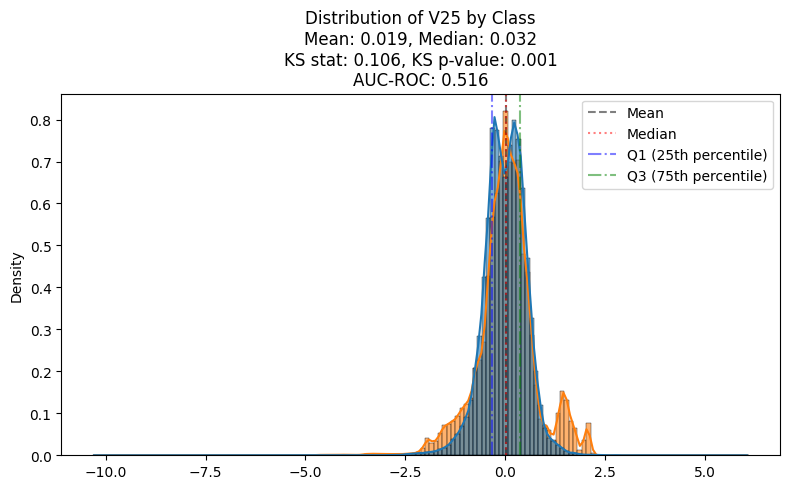

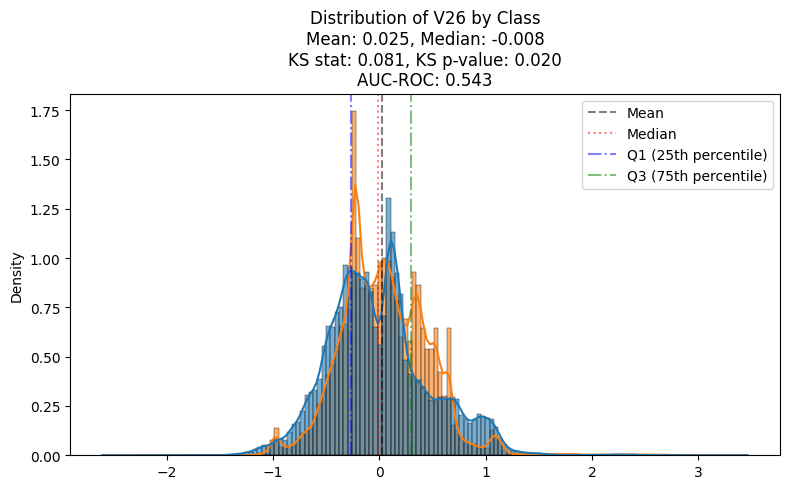

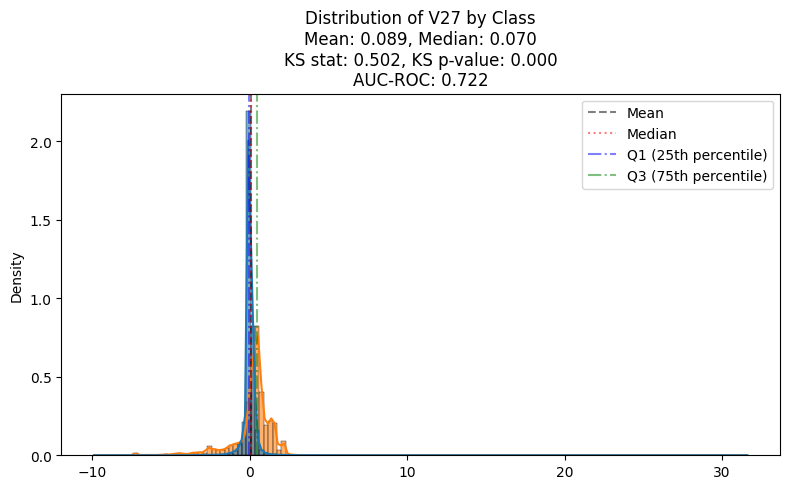

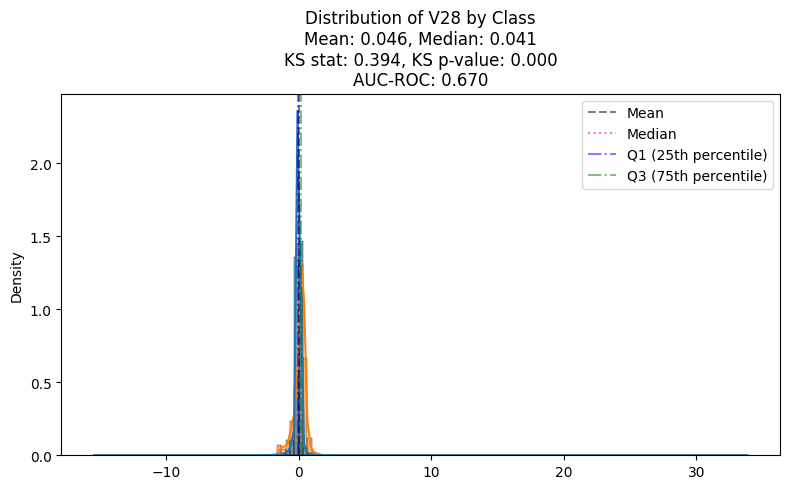

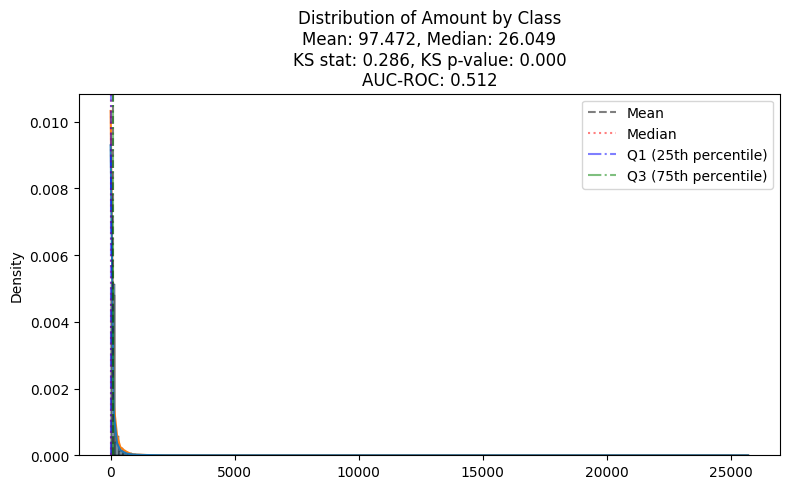

In [14]:
metrics = []
for col in df.columns[:-1]:
    metrics.append(plot_distribution(df_smote, col, output_metrics=True))

In [15]:
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.sort_values(by='ks_stat', ascending=False)
df_metrics.head(40)

feature          mean        median   ks_stat        ks_pval   auc_roc
14     V14     -3.530237     -1.370524  0.860382  4.383775e-293  0.020744
10     V10     -2.917098     -1.082742  0.825258  2.503348e-258  0.041487
12     V12     -3.189229     -1.327924  0.800339  4.332743e-237  0.025762
4       V4      2.339190      1.504158  0.770667  1.822753e-214  0.962991
11     V11      1.931208      1.239840  0.765354  1.139406e-210  0.948101
17     V17     -3.382916     -0.647108  0.759325  1.906271e-206  0.128217
3       V3     -3.690420     -1.579626  0.709572  1.396683e-174  0.055863
16     V16     -2.068185     -0.751784  0.692246  1.442739e-164  0.102154
7       V7     -2.924564     -0.784660  0.681801  9.119868e-159  0.105675
2       V2      1.924039      1.042268  0.654865  1.467903e-144  0.886866
9       V9     -1.339198     -0.841448  0.598489  6.103561e-118  0.116168
21     V21      0.178814      0.157977  0.512126   5.269484e-84  0.753211
6       V6     -0.748764     -0.702627  0.508453   1.009258e-82  0.207073
27     V27      0.088851      0.069908  0.501952   1.751850e-80  0.721642
18     V18     -1.125667     -0.403013  0.501834   1.922657e-80  0.229399
1       V1     -2.519112     -0.848595  0.484289   1.375122e-74  0.175041
5       V5     -1.653334     -0.445779  0.427713   1.749743e-57  0.278277
20     V20      0.256202      0.069852  0.413473   1.387370e-53  0.709005
28     V28      0.046188      0.040777  0.393775   1.898814e-48  0.670196
8       V8      0.433641      0.168783  0.364524   2.347955e-41  0.655071
19     V19      0.316221      0.220319  0.328364   1.923388e-33  0.663945
29  Amount     97.472041     26.049130  0.286299   2.223070e-25  0.512310
23     V23     -0.037947     -0.026813  0.189634   2.828715e-11  0.473609
0     Time  86924.425273  79887.000000  0.176819   7.499268e-10  0.407837
24     V24     -0.052531     -0.000687  0.132072   1.119245e-05  0.427802
25     V25      0.018664      0.031828  0.106280   7.918817e-04  0.516481
13     V13     -0.046412     -0.019514  0.103901   1.119251e-03  0.477638
26     V26      0.024602     -0.008316  0.081414   2.000115e-02  0.543262
15     V15     -0.083252     -0.018109  0.070498   6.298550e-02  0.458027
22     V22      0.043918      0.014453  0.064861   1.067673e-01  0.509121

## Temporal Analysis
Note: Since the data uses relative seconds, the specific datetimes are arbitrary. However, this conversion is still useful for visualizing patterns.

In [16]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df = df.set_index('Time')

In [17]:
print(f'Time index range: {df.index.min()} to {df.index.max()}')

Time index range: 1970-01-01 00:00:00 to 1970-01-02 23:59:48


[]

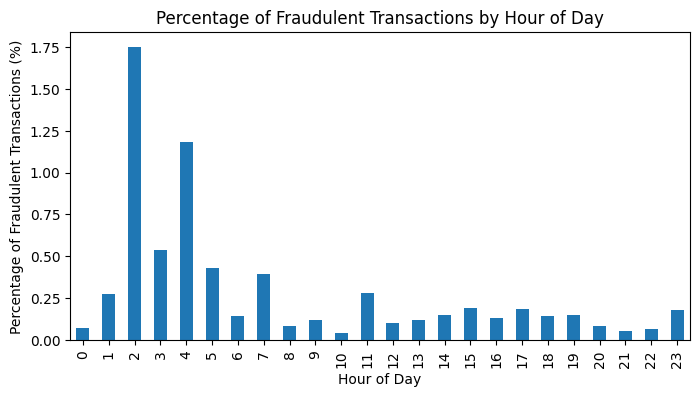

In [18]:
plt.figure(figsize=(8, 4))
(df.groupby(df.index.hour)['Class'].mean() * 100).plot(kind='bar')
plt.title('Percentage of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Fraudulent Transactions (%)')
plt.plot()

## Correlations

In [19]:
def correlation_matrix(correlation_matrix, ax=None, vmin=-1, vmax=1):
    """
    Description:
        - Plots a cool correlation matrix, based on seaborn heatmap
    Arguments:
        - Correlation Matrix Dataset (Ex: "df.corr()")
    """

    tri_mask = np.triu(np.ones_like(correlation_matrix))

    sns.heatmap(
        data=correlation_matrix,
        mask=tri_mask,
        annot=True,
        cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
        ax=ax,
        vmin=vmin,
        vmax=vmax,
    )

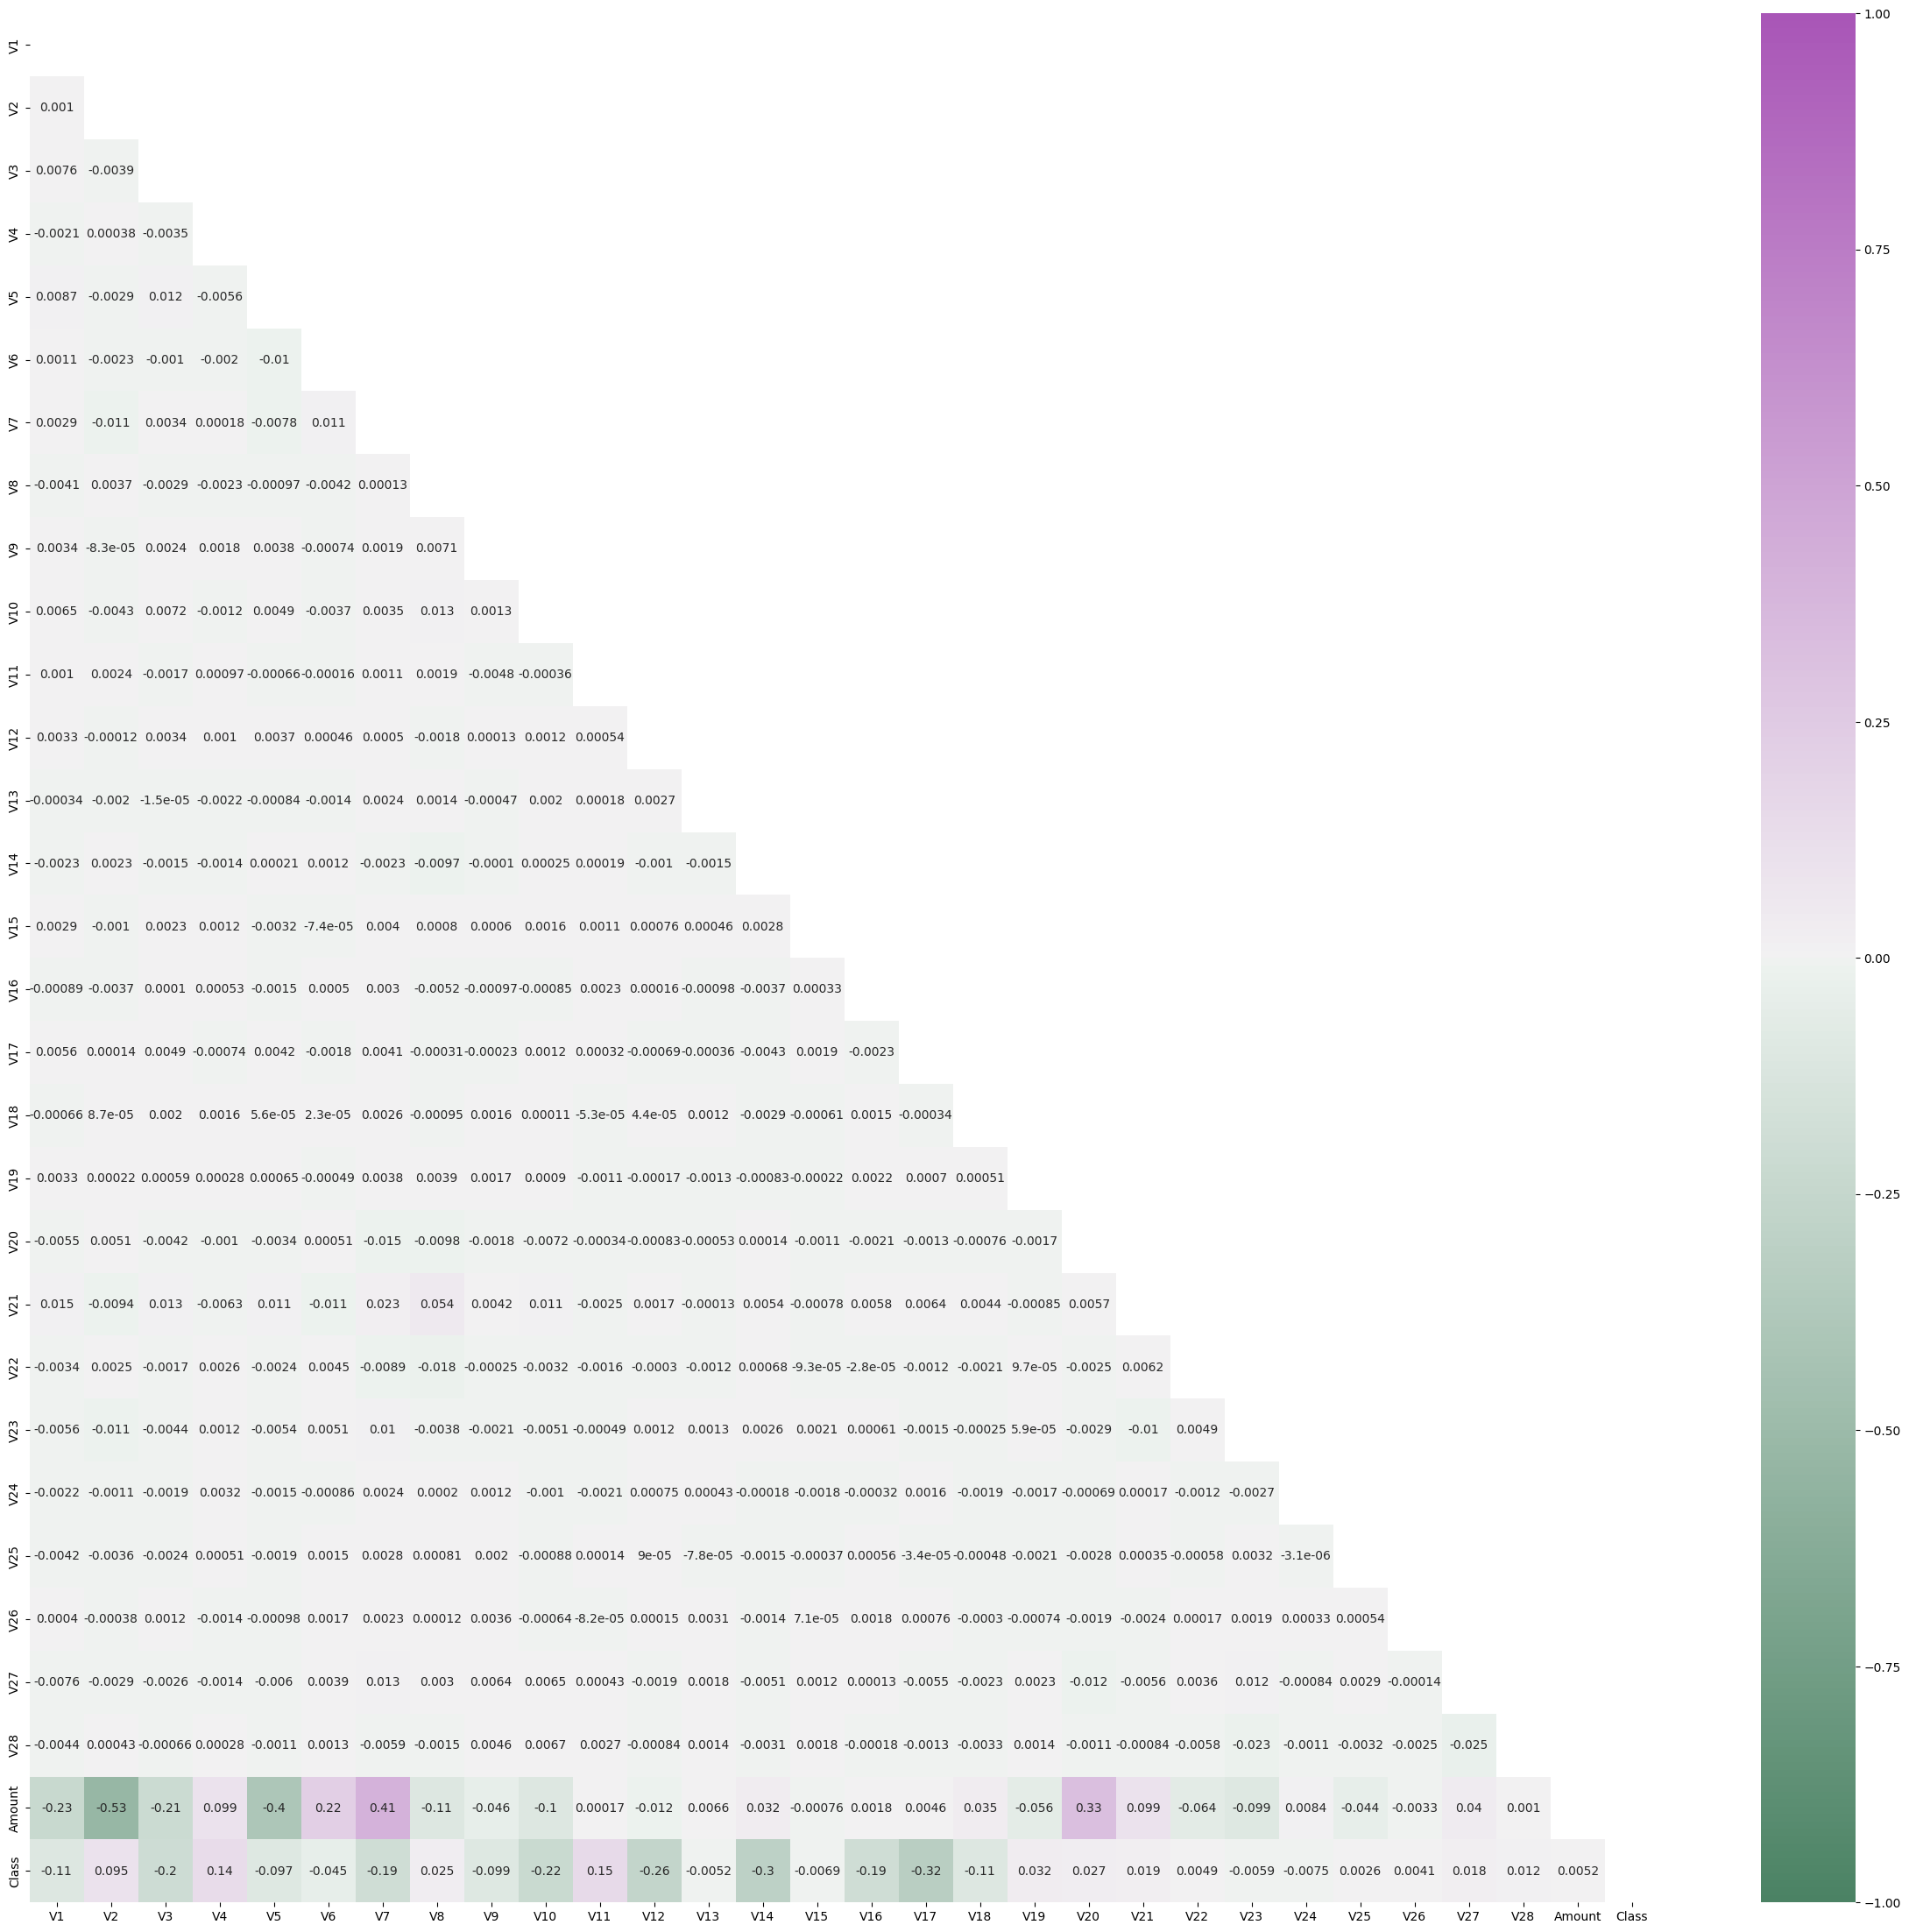

In [20]:
_, axes = plt.subplots(figsize=(30, 28))
correlation_matrix(df.corr())